In [1]:
#!/usr/bin/env python3
# coding=utf-8
import pandas as pd
import numpy as np
import sqlite3
import time
from datetime import datetime, timedelta
import math
import sys
import logging
import os
import re
from itertools import product as product
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import preprocessing, datasets, model_selection, decomposition , linear_model, neighbors
import sklearn
from sklearn.datasets import load_boston
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.stats import norm
from scipy import stats

import akshare as ak
import mplfinance as mpf
import seaborn as sns
from cycler import cycler       # 用于定制线条颜色
import talib as tb 

import matplotlib as mpl
from matplotlib import pyplot as plt, font_manager, mlab 	 # matplotlib中 中文设置模块

from PIL import Image
from IPython.display import Latex , Image, display, SVG, HTML

import warnings 
warnings.filterwarnings("ignore")

zhfont = font_manager.FontProperties(fname = '/usr/share/fonts/truetype/cn/SimHei.ttf')

warnings.filterwarnings('ignore')
plt.rcParams['font.family']='SimHei'
plt.rcParams['font.sans-serif']=['SimHei'] # 解决中文乱码 'Microsoft YaHei' 雅黑 
plt.rcParams['axes.unicode_minus']=False # 避免坐标轴不能正常的显示负号
plt.rc('font', family='SimHei', size=13)
%matplotlib inline  
# plt.show()

g_locTimeadj = 28800 # 28800 0
g_version = '1.0.1'

print(f"{sys.version} , {sys.executable} , sklearn: {sklearn.__version__} , matplotlibrc: {mpl.get_data_path() }")
print(f"{time.strftime('%Y-%m-%d %H:%M:%S',time.localtime(time.time()+g_locTimeadj))} *****import**v{g_version}*** ")

3.10.4 (main, Aug 22 2022, 22:50:25) [GCC 9.4.0] , /opt/python/latest/bin/python3 , sklearn: 1.1.2 , matplotlibrc: /home/codespace/.local/lib/python3.10/site-packages/matplotlib/mpl-data
2022-11-07 23:43:59 *****import**v1.0.1*** 


In [ ]:
# plt.plot(x,y,fmt,…)	坐标图
# plt.boxplot(data,notch,position)	箱型图
# plt.bar(left,height,width,bottom)	条形图
# plt.barh(width,bottom,left,height)	横向条形图
# plt.polar(theta,r)	极坐标图
# plt.ple(data,explore)	饼图
# plt.psd(x,NFFT=256,pad_to,Fs)	功率密度图
# plt.specgram(x,NFFT=256,pad_to,Fs)	谱图
# plt.cohere(x,y,NFFT=256,Fs)	X-Y相关性函数
# plt.scatter(x,y)	散点图
# plt.step(x,y,where)	步阶图
# plt.hist(x,bins,normed)	直方图

# 设置图像标题:plt.title()
# 设置x轴名称:plt.xlabel()
# 设置y轴名称:plt.ylabel()
# 设置x轴范围:plt.xlim()
# 设置y轴范围:plt.ylim()
# 设置x轴刻度:plt.xticks()
# 设置y轴刻度:plt.yticks()
# 设置曲线图例:plt.legend()

# matplotlibrc
# font.family         : sans-serif
# font.sans-serif     : SimHei, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif  
# axes.unicode_minus  : False

# plt.legend(loc='upper right', prop=zhfont) # 个图例
# plt.legend(['折线','sin曲线'], prop=zhfont)
# plt.ylabel('Y轴', fontproperties=zhfont)
# plt.title('sin散点', fontproperties=zhfont)
# plt.xticks(x, ('一','Sue','三','Ava',), fontproperties=zhfont)
# plt.yticks( fontproperties=zhfont)
# ax2.set_title('子图2', fontproperties=zhfont)
# Axes.set_xticks(()) # 清除X坐标和Y坐标
# Axes.set_yticks(())
# Axes.set_axis_off() # 清除tick和边框
# for front in pp[1]:
#     front.set_fontproperties(zhfont)

# fig, ax = plt.subplots(constrained_layout=True, figsize=(6, 4))
# plt.figure(figsize=(5, 3) )
# plt.rcParams.update(plt.rcParamsDefault) # 重设初始化默认参数配置

# 线型linestyle(-,-.,–,:)
# -实线(默认),–双划线,:虚线,:.点划线

# 点型marker(v.^,S,* ,H,+,x,D,o,…)
# +加号符,o空心圆,*星号,.实心圆,x叉号符,s(square)正方形,d菱形,^上三角形,v下三角形,>右三角形,<左三角形,p(pentagram)五角星,h(hexagram)六边形,square正方形,pentagram五角形,hexagram六角形

# 颜色color(b,g,r,y,k,w,…)
# r(red)红色,g(green)绿色,b(blue)蓝色,c(cyan)青绿色,m(magenta)洋红色,y(yellow)黄色,k(black)黑色,w(white)白色

# make_marketcolors() 设置k线颜色
# up 设置阳线柱填充颜色
# down 设置阴线柱填充颜色
# edge 设置蜡烛线边缘颜色 ‘i’ 代表继承k线的颜色
# wick 设置蜡烛上下影线的颜色
# volume 设置成交量颜色
# inherit 是否继承, 如果设置了继承inherit=True, 那么edge即便设了颜色也会无效

# make_mpf_style() 设置mpf样式
# gridaxis:设置网格线位置,both双向
# gridstyle:设置网格线线型
# y_on_right:设置y轴位置是否在右
# 注:在设置样式前要先设置格式

# plot绘图的部分参数
# data: pd.DataFrame, 包含'Open','High','Low','Close'字段, 如果要显示成交量, 还要提供'Volume', 默认时间序列索引(DatetimeIndex)
# type: 图表类型, 可选值包含:'ohlc', 'candle', 'line', 'renko', 'pnf'
# style: 蜡烛图样式, mplfinance提供了很多内置样式, 设置整个图表样式, 可以使用前面设置的样式my_style,只能在plot函数中使用指定整个图表样式, 不能在make_addplot中使用. 
# title: 标题
# volume: True表示添加成交量, 默认False
# ylabel: 纵轴标签 Y轴标题
# ylabel_lower: 成交量的Y轴标签
# figratio: 控制图表大小的元组 设置图形纵横比
# mav: 整数或包含整数的元组, 是否在图表中添加移动平均线 mav=(5,10,20,60) 
# show_nontrading= True 显示非交易日(k线之间有间隔), 默认False 不显示交易日, k线之间没有间隔
# figscale 设置图像的缩小或放大,1.5就是放大50%, 最大不会超过电脑屏幕大小
# savefig: 导出图片, 填写文件名及后缀


In [ ]:
# matplotlib font
import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    print(font.name)

In [11]:
from IPython.display import Latex , Image, display, SVG, HTML
from keras.utils.vis_utils import model_to_dot

%prun  # 用于代码的执行性能分析, 可以作为行命令和单元命令使用

# style = "<style>svg{width:50% !important;height:50% !important;}</style>"
# HTML(style)

# SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

# Latex(r"$\sqrt{x^2+y^2}$")

# _html_template='<img width="{}" src="data:image/svg+xml;base64,{}" >'
# def svg_to_fixed_width_html_image(svg, width="100%"):
#     text = _html_template.format(width, base64.b64encode(svg))
#     return HTML(text)
# svg_to_fixed_width_html_image(svg)

# Image('https://raw.githubusercontent.com/datawhalechina/hands-on-data-analysis/master/%E7%AC%AC%E4%B8%89%E7%AB%A0%E9%A1%B9%E7%9B%AE%E9%9B%86%E5%90%88/20170624105439491.png') # .resize((50,50),Image.ANTIALIAS)


# %load_ext sympyprinting
from sympy import *
from sympy import init_printing, init_session

init_printing()
x, y = symbols("x,y")
sqrt(x**2+y**2)
    
# str(Integral(sqrt(1/x), x)) 


         3 function calls in 0.000 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

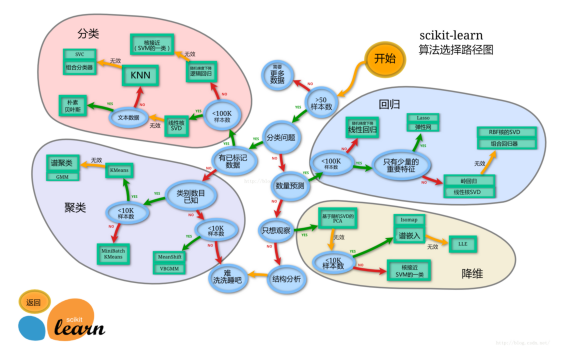

In [20]:
# 加载在线图片
img = plt.imread('https://raw.githubusercontent.com/datawhalechina/hands-on-data-analysis/master/%E7%AC%AC%E4%B8%89%E7%AB%A0%E9%A1%B9%E7%9B%AE%E9%9B%86%E5%90%88/20170624105439491.png')

# plt.xticks([]) # plt.xticks(fontproperties='Times New Roman', size=20)
# plt.yticks([]) # 无坐标轴

# frame = plt.gca()
# frame.axes.get_yaxis().set_visible(False) # y 轴不可见
# frame.axes.get_xaxis().set_visible(False) # x 轴不可见

plt.figure(figsize=(7,5) )
plt.axis('off')
plt.imshow(img)
# plt.show()

# img = np.random.randn(100,100)
# plt.imsave("kapal.png",img)  # 保存没有任何轴 边框和空白的图像

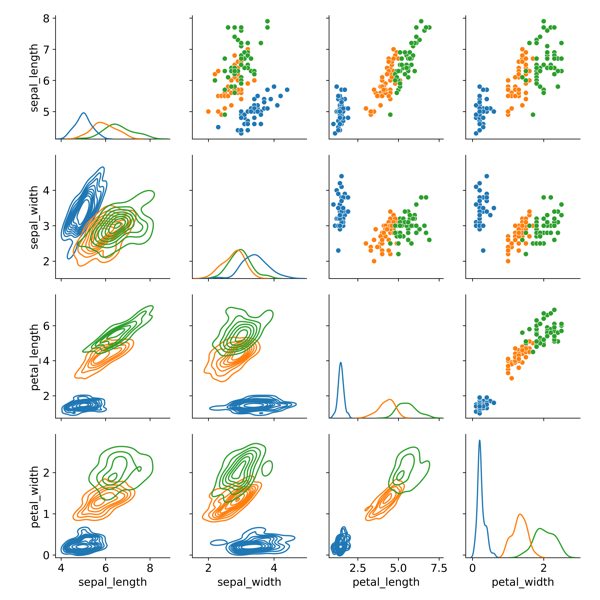

In [6]:
# 加载本地图片
from PIL import Image
from IPython.display import display
# display(Image.open('imageURL'))

image = Image.open('../pkl/iris.png')
# display(image.resize((600,600),Image.ANTIALIAS))

scale = 0.1
display(image.resize(( int(image.width * scale), int(image.height * scale))))

In [3]:
# plot参数设置 rcParams

# import mplfinance as mpf
# import matplotlib as mpl        # 用于设置曲线参数
# from cycler import cycler       # 用于定制线条颜色
# import pandas as pd             # 导入DataFrame数据
# import matplotlib.pyplot as plt
# import akshare as ak
# import datetime
# import talib as tb 
import warnings 
warnings.filterwarnings("ignore")

zhfont = font_manager.FontProperties(fname = '/usr/share/fonts/truetype/cn/SimHei.ttf')

warnings.filterwarnings('ignore')
plt.rcParams['font.family']='SimHei'
plt.rcParams['font.sans-serif']=['SimHei'] # 解决中文乱码 'Microsoft YaHei' 雅黑 
plt.rcParams['axes.unicode_minus']=False # 避免坐标轴不能正常的显示负号
plt.rc('font', family='SimHei', size=13)
%matplotlib inline 

symbol="000001"

kwargs = dict(type='hollow_and_filled', mav=(5, 10, 20, 60), volume=True, title='%s' % (symbol), ylabel='Price', ylabel_lower='Volume') # candle    
# 收盘价:红 涨up>昨收   ; Hollow空心 阳线>开盘
#        绿 跌down<昨收 ; Filled实心 阴线<开盘

# mc = mpf.make_marketcolors(	up='red', down='green', edge='i', wick='i', volume='in', inherit=True)
# s = mpf.make_mpf_style(gridaxis='both', gridstyle='-.', y_on_right=False, marketcolors=mc)

my_color=mpf.make_marketcolors(up='red',down='green',edge='i',wick='i',volume={'up':'red','down':'green'}, ohlc='black',inherit=False)

my_style=mpf.make_mpf_style(base_mpf_style='yahoo',marketcolors=my_color,gridaxis='both',gridstyle='-.',y_on_right=False,rc={'font.family':'SimHei'})


mpl.rcParams['axes.prop_cycle'] = cycler(color=['dodgerblue', 'deeppink', 'navy', 'teal', 'maroon', 'darkorange', 'indigo'])
mpl.rcParams['lines.linewidth'] = 0.3

In [4]:
# 历史行情 sina 新浪

endDate = datetime.now().strftime("%Y%m%d")
df = ak.stock_zh_a_daily(symbol="sz000001", start_date="20220101", end_date=endDate, adjust="qfq")

# date open high low close volume outstanding_share流动股本 turnover换手率=成交量/流动股本Tor
# print( f"{ df.head(2) }")
df.columns = ["Date", "Open", "High", "Low", "Close", "Volume", "Outshare", "Tor"]
print( f"df.head(2) :\n{ df.head(2) }")

dailydf = df[["Date", "Open", "High", "Low", "Close", "Volume"]]
dailydf['Date'] = pd.to_datetime(dailydf['Date'])
dailydf.set_index(['Date'], inplace=True)
print( f"dailydf.tail(5) :\n{ dailydf.tail(5) }")

df.head(2) :
        Date   Open   High    Low  Close       Volume      Outshare       Tor
0 2022-01-04  16.19  16.37  15.90  16.37  116925933.0  1.940552e+10  0.006025
1 2022-01-05  16.29  16.92  16.26  16.85  196199817.0  1.940552e+10  0.010111
dailydf.tail(5) :
             Open   High    Low  Close       Volume
Date                                               
2022-11-01  10.38  10.68  10.36  10.67  138123413.0
2022-11-02  10.61  10.68  10.48  10.63  130298818.0
2022-11-03  10.54  10.57  10.38  10.44   98353561.0
2022-11-04  10.40  10.85  10.39  10.82  177611223.0
2022-11-07  10.81  10.91  10.73  10.88   98808204.0


In [ ]:
# 历史行情 dfcf 东方财富

df = ak.stock_zh_a_hist(symbol=symbol, period="daily", start_date="20220101", end_date='20221107', adjust="qfq")
# 日期 开盘 收盘 最高 最低 成交量 成交额 振幅 涨跌幅 涨跌额 换手率
print( f"{ df.head(2) }")

eNameFile = 'eName.csv'
eNamePath = os.path.join('/workspaces/jupyter/stock/', eNameFile)
eName_df = pd.read_csv(eNamePath)
# print( f"{ eName_df.head(2) = }")

daily_df = df.copy(deep=True)

eName_daily_df = eName_df[eName_df.dfcf.isin( daily_df.columns.values.tolist() )]
eName_daily_df = eName_df[['akshare','En' ]].reset_index(drop=True)
daily_df.rename(columns=dict(eName_daily_df.values.tolist() ), inplace=True)
# print( f"{ eName_daily_df =  }")
# print( f"{ daily_df.tail(5) =  }")

daily_df['Date'] = pd.to_datetime(daily_df['Date'])
daily_df.set_index(['Date'], inplace=True)
dailydf = daily_df[["Open", "High", "Low", "Close", "Volume"]]
# dailydf = dailydf["2022-08-01": "2022-11-01"]
print( f"{ dailydf.tail(5) }")
# mpf.plot(dailydf, type='candle', style='yahoo', mav=(3, 6, 9), volume=True, show_nontrading=False)

             Open   High    Low  Close   Volume
Date                                           
2022-10-31  10.33  10.45  10.22  10.34   983096
2022-11-01  10.38  10.68  10.36  10.67  1381234
2022-11-02  10.61  10.68  10.48  10.63  1302988
2022-11-03  10.54  10.57  10.38  10.44   983536
2022-11-04  10.40  10.85  10.39  10.82  1776112


In [5]:
# 通达信, 同花顺 MACD Talib实现
def SMA_CN(close, timeperiod):
    close = np.nan_to_num(close)
    return reduce(lambda x, y: ((timeperiod - 1) * x + y) / timeperiod, close)

def MACD_CN(close, fastperiod, slowperiod, signalperiod):
    macdDIFF, macdDEA, macd = tb.MACDEXT(close, fastperiod=fastperiod, fastmatype=1,slowperiod=slowperiod, slowmatype=1, signalperiod=signalperiod, signalmatype=1)
    macd = macd * 2
    return macdDIFF, macdDEA, macd

def RSI_CN(close, timeperiod) :
    diff = map(lambda x, y : x - y, close[1:], close[:-1])
    diffGt0 = map(lambda x : 0 if x < 0 else x, diff)
    diffABS = map(lambda x : abs(x), diff)
    diff = np.array(diff)
    diffGt0 = np.array(diffGt0)
    diffABS = np.array(diffABS)
    diff = np.append(diff[0], diff)
    diffGt0 = np.append(diffGt0[0], diffGt0)
    diffABS = np.append(diffABS[0], diffABS)
    rsi = map(lambda x : SMA_CN(diffGt0[:x], timeperiod) / SMA_CN(diffABS[:x], timeperiod) * 100, range(1, len(diffGt0) + 1) )
    
    return np.array(rsi)

def KDJ_CN(high, low, close, fastk_period, slowk_period, fastd_period):
    kValue, dValue = tb.STOCHF(high, low, close, fastk_period, fastd_period=1, fastd_matype=0)
    
    kValue = np.array(map(lambda x : SMA_CN(kValue[:x], slowk_period), range(1, len(kValue) + 1)))
    dValue = np.array(map(lambda x : SMA_CN(kValue[:x], fastd_period), range(1, len(kValue) + 1)))
    
    jValue = 3 * kValue - 2 * dValue
    
    func = lambda arr : np.array([0 if x < 0 else (100 if x > 100 else x) for x in arr])
    
    kValue = func(kValue)
    dValue = func(dValue)
    jValue = func(jValue)
    return kValue, dValue, jValue


In [6]:
# MACD
stock_df = dailydf.copy(deep=True)
macd, signal, hist = tb.MACD(stock_df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
macd_DIF = pd.DataFrame(macd,columns=['0'])
macd_DEA = pd.DataFrame(signal,columns=['0'])
macd_BAR = pd.DataFrame(hist,columns=['0'])
macd_BARP = pd.DataFrame(np.where(hist > 0, 2 * hist, 0),columns=['0']) # 绘制BAR>0 柱状图
macd_BARN = pd.DataFrame(np.where(hist < 0, 2 * hist, 0),columns=['0']) # 绘制BAR<0 柱状图

# exp12     = df['Close'].ewm(span=12, adjust=False).mean()
# exp26     = df['Close'].ewm(span=26, adjust=False).mean()
# macd      = exp12 - exp26
# signal    = macd.ewm(span=9, adjust=False).mean()
# histogram = macd - signal


In [7]:
# KDJ
kdj_K, kdj_D = tb.STOCH(stock_df['High'], stock_df['Low'],stock_df['Close'], fastk_period=9, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
kdj_K = pd.DataFrame(kdj_K,columns=['0'])
kdj_D = pd.DataFrame(kdj_D,columns=['0'])
kdj_J = 3*kdj_K['0'] -2*kdj_D['0']
kdj_J = pd.DataFrame(kdj_J,columns=['0'])

# KDJ_CN(high, low, close, fastk_period, slowk_period, fastd_period)
# kdj_K, kdj_D, kdj_J = KDJ_CN(stock_df['High'], stock_df['Low'],stock_df['Close'], fastk_period=9, slowk_period=3, fastd_period=3)


In [8]:
# RSI
rsi=tb.RSI(stock_df.Open, timeperiod=12)
rsi=pd.DataFrame(rsi,columns=['0'])

# RSI_CN(stock_df.Close, timeperiod=12)
# rsi=pd.DataFrame(RSI_CN,columns=['0'])

In [9]:
# 唐奇安通道
# 设定上, 下, 中通道线初始值
upboundDC = pd.Series(0.0, index=stock_df.index)
downboundDC = pd.Series(0.0, index=stock_df.index)
midboundDC = pd.Series(0.0, index=stock_df.index)

# 求唐奇安上, 中, 下通道
for i in range(20,len(stock_df)):
	upboundDC[i] = max(stock_df.High[(i-20):i])
	downboundDC[i] = min(stock_df.Low[(i-20):i])
	midboundDC[i] = 0.5 * (upboundDC[i] + downboundDC[i])

In [10]:
# 信号 买卖点
buy_df = np.where((stock_df['Close'] > stock_df['Open']) & (stock_df['Close'].shift(1) < stock_df['Open'].shift(1)), 1, np.nan) * 0.98 * stock_df['Low']

# ma 移动平均
volma10_df = stock_df['Volume'].rolling(window=10, closed='left').mean()
volma5_df = stock_df['Volume'].rolling(window=5, closed='left').mean()

In [11]:
# print(f"{macd_DIF.tail(2)=}")
# print(f"{macd_DEA.tail(2)=}")
# print(f"{macd_BAR.tail(2)=}")
# print(f"{kdj_K.tail(2)=}")
# print(f"{kdj_D.tail(2)=}")
# print(f"{kdj_J.tail(2)=}")
# print(f"{rsi.tail(2)=}")
# print(f"{buy_df.tail(5)=}")
print(f"{stock_df.tail(10)=}")

stock_df.tail(10)=             Open   High    Low  Close       Volume
Date                                               
2022-10-25  10.70  10.81  10.60  10.65  131697940.0
2022-10-26  10.64  10.73  10.61  10.66  114382988.0
2022-10-27  10.70  10.77  10.66  10.68   95738346.0
2022-10-28  10.63  10.70  10.41  10.42  105794701.0
2022-10-31  10.33  10.45  10.22  10.34   98309569.0
2022-11-01  10.38  10.68  10.36  10.67  138123413.0
2022-11-02  10.61  10.68  10.48  10.63  130298818.0
2022-11-03  10.54  10.57  10.38  10.44   98353561.0
2022-11-04  10.40  10.85  10.39  10.82  177611223.0
2022-11-07  10.81  10.91  10.73  10.88   98808204.0


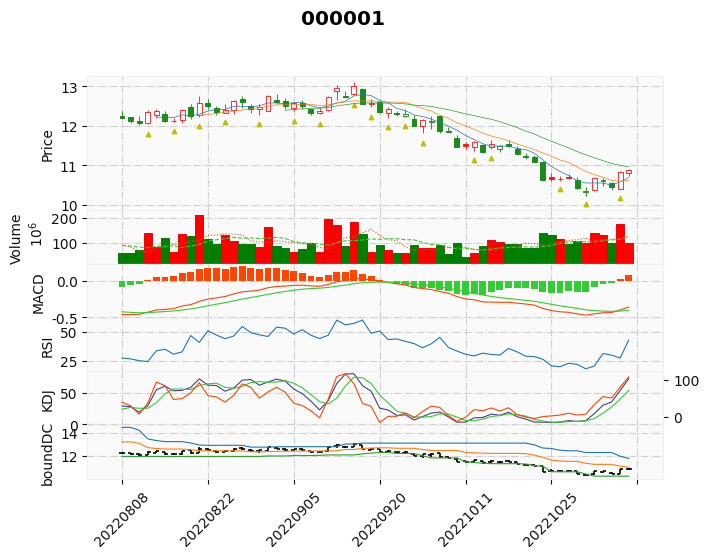

In [22]:
#设置配图
add_plot = [ 
    mpf.make_addplot(buy_df.tail(60), type='scatter', markersize=10, marker='^', color='y'),
    mpf.make_addplot(volma5_df.tail(60), panel=1, color='orangered', linestyle=':' ),
    mpf.make_addplot(volma10_df.tail(60), panel=1, color='limegreen', linestyle='--' ),
    # mpf.make_addplot(macd_BAR.tail(60),type='bar',panel=2,ylabel='MACD',color='darkslateblue'),
    mpf.make_addplot(macd_BARP.tail(60),type='bar',panel=2,ylabel='MACD',color='orangered'),
    mpf.make_addplot(macd_BARN.tail(60),type='bar',panel=2,color='limegreen'),
    mpf.make_addplot(macd_DIF.tail(60),panel=2,color='orangered'),
    mpf.make_addplot(macd_DEA.tail(60),panel=2,color='limegreen'),
    mpf.make_addplot(rsi.tail(60),panel=3,ylabel='RSI'),
    mpf.make_addplot(kdj_K.tail(60),panel=4,color='darkslateblue', ylabel='KDJ'),
    mpf.make_addplot(kdj_D.tail(60),panel=4,color='limegreen'),
    mpf.make_addplot(kdj_J.tail(60),panel=4,color='orangered'),
    mpf.make_addplot(stock_df.tail(60),type='ohlc',panel=5),
    mpf.make_addplot(upboundDC.tail(60),panel=5, ylabel='boundDC'),
    mpf.make_addplot(midboundDC.tail(60),panel=5),
    mpf.make_addplot(downboundDC.tail(60),panel=5),    
]
mpf.plot(stock_df.tail(60),**kwargs, addplot=add_plot, style=my_style, update_width_config=dict(candle_linewidth=0.5, line_width=0.5), datetime_format='%Y%m%d' ) # style='yahoo',

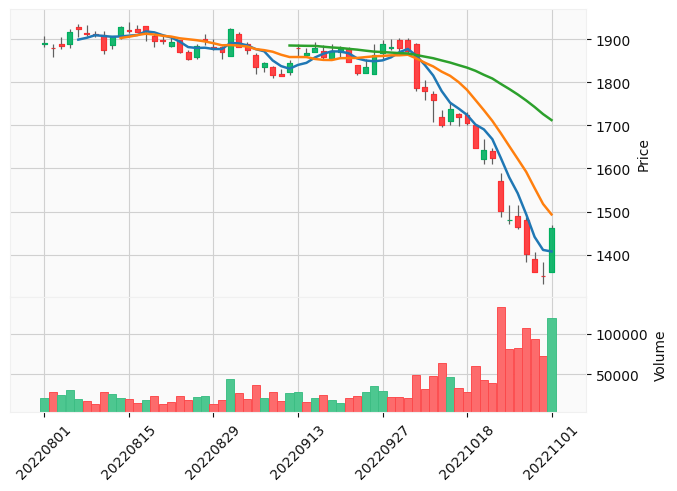

In [4]:
mpf.plot(dailydf, type='candle', style='yahoo', mav=(5, 10, 30), volume=True, datetime_format='%Y%m%d', show_nontrading=False)


In [20]:
df = ak.stock_us_daily(symbol="AAPL", adjust="qfq")
print( f"{ df.head(2) }")

        date    open    high     low   close     volume
0 1980-12-12 -6.5914 -6.5908 -6.5914 -6.5914  2093900.0
1 1980-12-15 -6.5980 -6.5975 -6.5980 -6.5980   785200.0


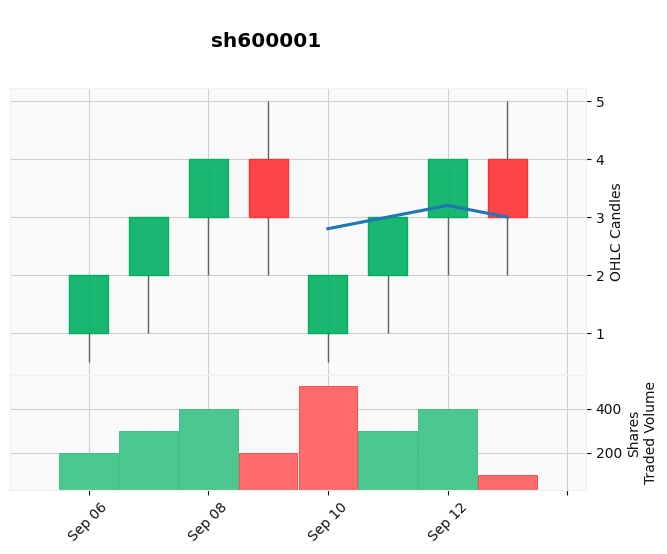

In [12]:
import mplfinance as mpf
import matplotlib as mpl        # 用于设置曲线参数
from cycler import cycler       # 用于定制线条颜色
import pandas as pd             # 导入DataFrame数据
import matplotlib.pyplot as plt


index_date = pd.DatetimeIndex(['20210906', '20210907', '20210908', '20210909', '20210910', '20210911', '20210912', '20210913'])

data = pd.DataFrame({
    'Open': [1, 2, 3, 4, 1, 2, 3, 4], 
    'High': [2, 3, 4, 5, 2, 3, 4, 5], 
    'Low' : [0.5, 1, 2, 2, 0.5, 1, 2, 2],
    'Close': [2, 3, 4, 3, 2, 3, 4, 3],
    'Volume': [200, 300, 400, 200, 500, 300, 400, 100]
}, index=index_date) # 随便创建数据

# mpf.plot(data,type='candle', mav=(2, 3) ) #  line candle 

symbol = 'sh600001'

# 设置基本参数
kwargs = dict(type='candle', mav=(5, 30, 60), volume=True, title='\n %s ' % (symbol), ylabel='OHLC Candles', ylabel_lower='Shares\nTraded Volume')
# type:绘制图形的类型, 有candle, renko, ohlc, line, bar 等
# 此处选择candle,即K线图
# mav(moving average):均线类型,此处设置7,30,60日线
# volume:布尔类型, 设置是否显示成交量, 默认False
# title:设置标题
# y_label:设置纵轴主标题
# y_label_lower:设置成交量图一栏的标题
# figratio:设置图形纵横比 figratio=(15, 10)
# figscale:设置图形尺寸(数值越大图像质量越高) figscale=5
#datetime_format:设置日期显示格式
#xrotation:设置x坐标的转角度

# 设置marketcolors 蜡烛颜色
# mc = mpf.make_marketcolors(	up='red', down='green', edge='i', wick='i', volume='in', inherit=True)
mc = mpf.make_marketcolors(	up='green', down='red', edge='i', wick='i', volume='in', inherit=True)
# up:设置K线线柱颜色, up意为收盘价大于等于开盘价, 阳线颜色
# down:与up相反, 这样设置与国内K线颜色标准相符, 阴线颜色
# edge:K线线柱边缘颜色(i代表继承自up和down的颜色), 下同
# wick:灯芯(上下影线)颜色
# volume:成交量直方图的颜色
# inherit:是否继承, 选填
	
# 设置图形风格
s = mpf.make_mpf_style(gridaxis='both', gridstyle='-.', y_on_right=False, marketcolors=mc)

# base_mpf_style	使用mplfinance中的系统样式 , 可以在make_marketcolors方法中使用, 也可以在make_mpf_style中使用
# base_mpl_style	可以同时使用matplotlib中的系统样式, 比如:base_mpl_style='seaborn'
# marketcolors	使用自定义样式
# mavcolors	设置ma均线颜色, 必须使用列表传参
# facecolor	设置前景色
# edgecolor	图像边缘线颜色
# figcolor	图像外周围填充色, 图表的背景色
# gridcolor	网格线颜色
# gridaxis	设置网格线位置 方向,both, 'horizontal', 'vertical'
# gridstyle	设置网格线线型 '-'solid, '–'dashed, '-.'dashdot, ':'dotted, None' '
# y_on_right	设置y轴位置是否在右
# rc	使用rcParams的dict设置样式, 如果内容与上面的自定义设置相同, 那么自定义设置覆盖rcParams设置


# 设置均线颜色, 配色表可见下图
mpl.rcParams['axes.prop_cycle'] = cycler(color=['dodgerblue', 'deeppink', 'navy', 'teal', 'maroon', 'darkorange', 'indigo'])
# 建议设置较深的颜色且与红色, 绿色形成对比
# 此处设置七条均线的颜色, 也可应用默认设置
    
# 设置线宽
mpl.rcParams['lines.linewidth'] = 0.5

# mpf.available_styles() # 
# 'binance', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'yahoo'

# 图形绘制
# show_nontrading:是否显示非交易日, 默认False, 自动剔除非交易日空白True 
# savefig:导出图片, 填写文件名及后缀 # savefig='A_stock-%s %s_candle_line' % (symbol, period) + '.jpg'
# mpf.plot(data, **kwargs, style=s, show_nontrading=False)
mpf.plot(data, **kwargs, style='yahoo', show_nontrading=False) # classic 黑白 右标签


# mpf.make_addplot()
# scatter参数, 默认为Flase, 设置为True可以绘制散点图. 
# marker为添加标记点. scatter要先设为True才能显示标记点. 
# ^表示正三角形,  v表示倒三角形
# markersize为标记点尺寸. 
# color为设定颜色 color为标记点的颜色, 不是线条的
# 设置panel ="lower"后, 可以让线条现实中附图的成交量上边. 

# plt.show()

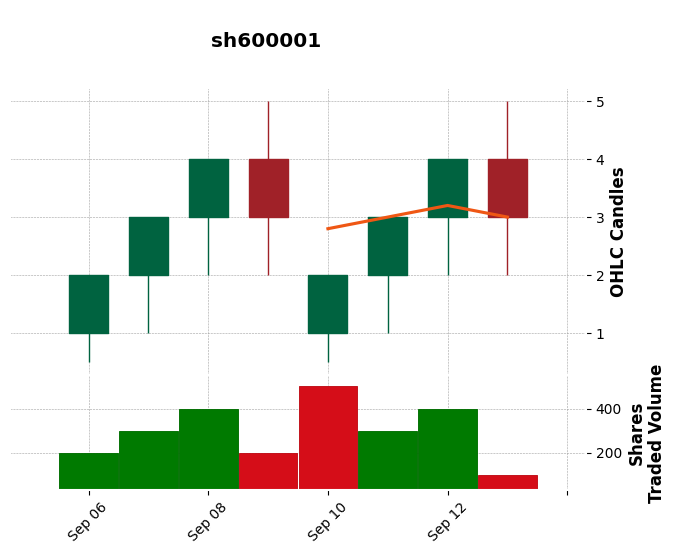

In [17]:
mpf.plot(data, **kwargs, style='charles', show_nontrading=False) # classic 黑白 右标签
# 'binance', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'yahoo'

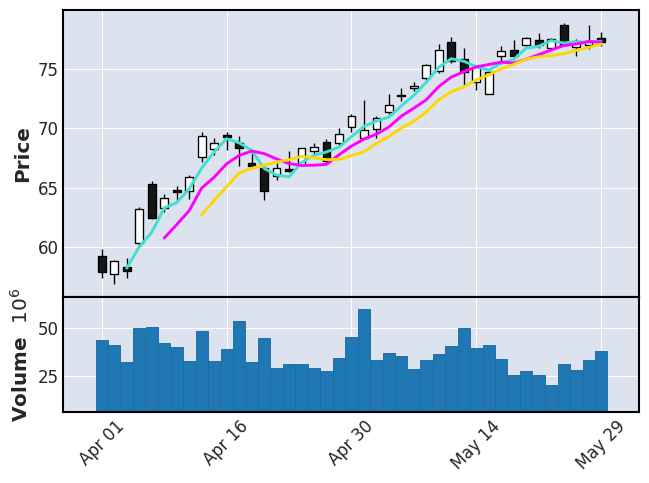

In [8]:
# 美股K线图 AAPL
import akshare as ak
import mplfinance as mpf  # 

df = ak.stock_us_daily(symbol="AAPL", adjust="qfq")
# print(f"{df =}")
df['Date'] = pd.to_datetime(df['date'])
df.set_index(['Date'], inplace=True)
df = df[["open", "high", "low", "close", "volume"]]
df.columns = ["Open", "High", "Low", "Close", "Volume"]
df.index.name = "Date"
df = df["2020-04-01": "2020-05-29"]
mpf.plot(df, type='candle', mav=(3, 6, 9), volume=True, show_nontrading=False)

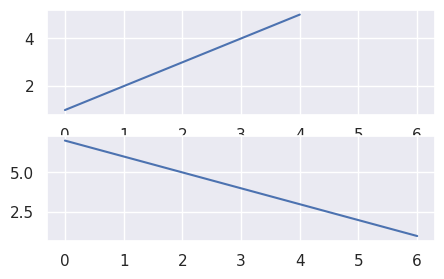

In [6]:
# 共享坐标轴
# fig = plt.figure()
fig = plt.figure(figsize=(5,3) )
ax1 = fig.add_subplot(211)
ax1.plot([1,2,3,4,5])
ax2 = fig.add_subplot(212,sharex=ax1)
ax2.plot([7,6,5,4,3,2,1])
fig.show()

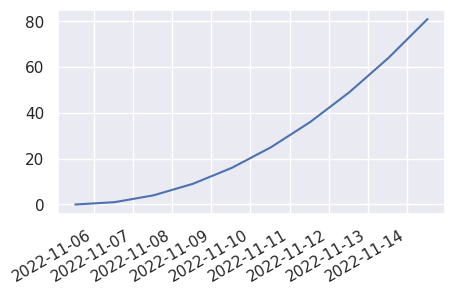

In [9]:
# 横坐标不重叠
# d0 = datetime.date(2016,1,1)
# d0 = datetime.strptime('2019-09-12','%Y-%m-%d')
d0 = datetime.now()
ndates = [d0+timedelta(i) for i in range(10)]
n_ys = [i*i for i in range(10)]

# plt.figure(figsize=(5,3) )
fig2,ax2 = plt.subplots(1, figsize=(5,3) )
ax2.plot(ndates,n_ys)

fig2.autofmt_xdate() # 调整x轴时间的显示
# ax2.set_xticklabels(ndates,rotation=25,ha="right")

plt.show()

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


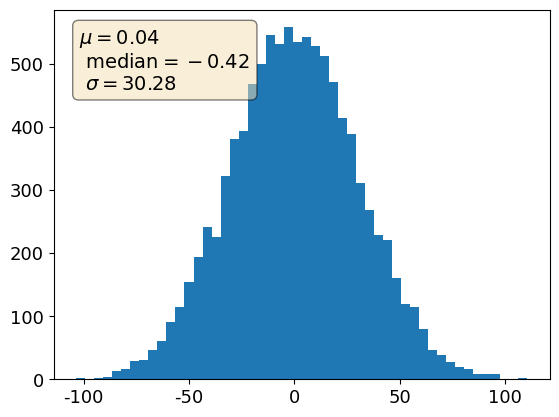

In [25]:
# 放置 text box
fig,ax = plt.subplots(1)
x = 30 * np.random.randn(10000)
mu = x.mean()
median = np.median(x)
sigma = x.std()
textstr = '$\mu=%.2f$ \n $\mathrm{median}=%.2f$ \n $\sigma=%.2f$'%(mu,median,sigma)
ax.hist(x,50)

props=dict(boxstyle='round',facecolor='wheat',alpha=0.5)
ax.text(0.05,0.95,textstr,transform=ax.transAxes,fontsize=14,verticalalignment='top',bbox=props)
fig.show()

Text(0.5, 1.0, 'move axis')

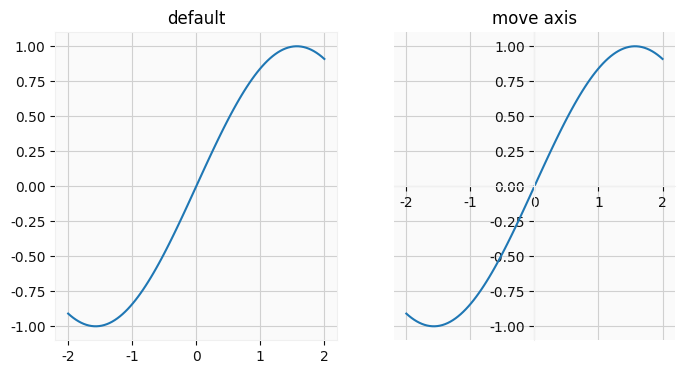

In [14]:
# 平移坐标轴
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-2,2,num=100)  
Y = np.sin(X)
fig = plt.figure(figsize=(8,4))
# ax1
ax1 = fig.add_subplot(1,2,1)
ax1.plot(X,Y)
ax1.set_title('default')

# ax2
ax2 = fig.add_subplot(1,2,2)
ax2.plot(X,Y)
ax2.spines['right'].set_color('none') # 不显示右边框
ax2.spines['top'].set_color('none') # 不显示上边框

ax2.xaxis.set_ticks_position('bottom') # 设置x坐标轴为下边框
ax2.yaxis.set_ticks_position('left') # 设置y坐标轴为左边框

ax2.spines['bottom'].set_position(('data',0))# 设置x轴, y轴在(0, 0)的位置
ax2.spines['left'].set_position(('data',0))

ax2.set_title('move axis')

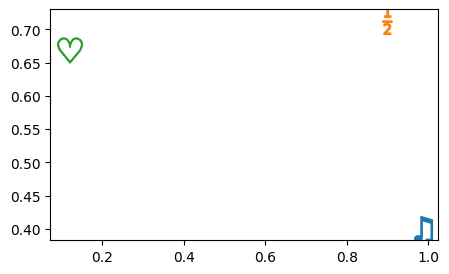

In [17]:
import matplotlib.pyplot as plt 
import numpy as np 

data = np.random.rand(3,2)
fig = plt.figure(figsize=(5,3)) 
ax = fig.add_subplot(111) 
markers = ["$\u266B$", r"$\frac{1}{2}$", "$\heartsuit$"]
for i in range(data.shape[0]):
    ax.scatter(data[i,0], data[i,1], marker=markers[i], s=400) 
plt.show() 

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


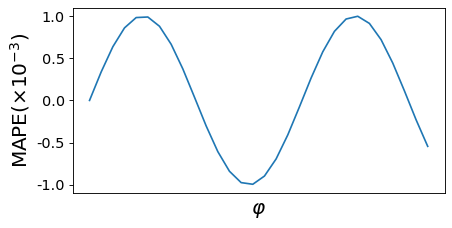

In [2]:
# 折线图
# 展现变量的变化趋势
# 用plot方法画出x=(0,10)间sin的图像
x = np.linspace(0, 10, 30)

plt.figure(figsize=(6,3),dpi = 80)

plt.plot(x, np.sin(x))
plt.xticks( [] ) # 不显示横坐标
plt.xlabel(r'$\varphi$', fontdict={'color': 'black','family': 'Times New Roman','size': 18})
plt.ylabel(r'MAPE($\times 10^{-3}$)', fontdict={'color': 'black','family': 'Times New Roman','size': 18})
plt.show()

# plt.plot(x, y, linestyle, linewidth,color,marker, markersize, markeredgecolor, markerfactcolor, label, alpha)
# x: 指定折线图的x轴数据; 
# y: 指定折线图的y轴数据; 
# linestyle: 指定折线的类型, 可以是实线/虚线/点虚线/点点线等, 默认文实线; 
# linewidth: 指定折线的宽度
# marker: 可以为折线图添加点, 该参数是设置点的形状; 
# markersize: 设置点的大小; 
# markeredgecolor: 设置点的边框色; 
# markerfactcolor: 设置点的填充色; 
# label: 为折线图添加标签, 类似于图例的作用; 


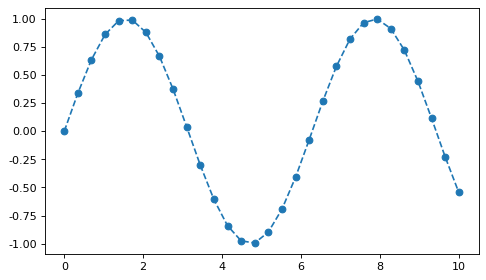

In [15]:
# 用点加虚线的方式画出x=(0,10)间sin的图像
plt.figure(figsize=(7,4),dpi = 80)
plt.plot(x, np.sin(x), linestyle='--', marker='o') 
plt.show()

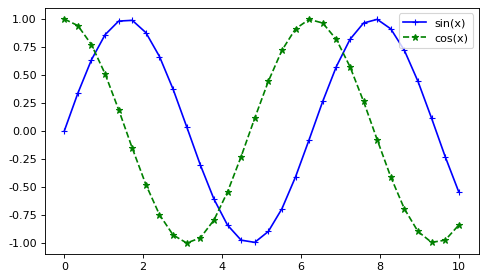

In [17]:
# 同时绘制cos和sin图像在同一图中
plt.figure(figsize=(7,4),dpi = 80)
plt.plot(x, np.sin(x), color='b', linestyle='-', marker='+', label='sin(x)')  #或'b-+'
plt.plot(x, np.cos(x), color='g', linestyle='--', marker='*', label='cos(x)') #或'g--*'
plt.legend(loc='upper right')
plt.show()

#fmt: 6种组合
# [color][marker][line],3种任意组合为6种可能,每个都是可选的,每个属性可以选择写或者不写,而且与组合中它们所在的位置顺序无关;


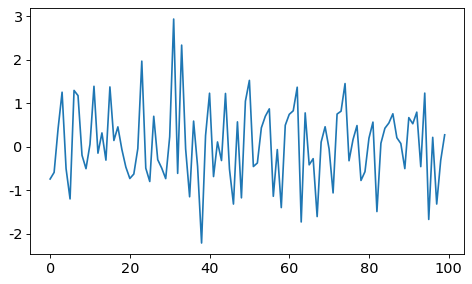

In [8]:
# 绘制折线图
y = np.random.randn(100)
x = np.arange(100)
plt.figure(figsize=(7,4),dpi = 80)
plt.plot(x,y)
plt.show()

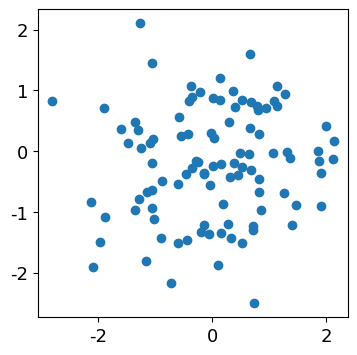

In [17]:
# 散点图
# 寻找变量之间的关系
# 绘制两组100个随机数的散点图
plt.figure(figsize=(4,4) )
x = np.random.randn(100)
y = np.random.randn(100)
plt.scatter(x, y)
plt.show()

# plt.scatter(x, y, s, c, marker, cmap, norm, alpha, linewidths, edgecolorsl)
# 参数说明: 
# x: x轴数据
# y: y轴数据
# s: 散点大小
# c: 散点颜色
# marker: 散点图形状
# cmap: 指定某个colormap值,该参数一般不用, 用默认值
# alpha: 散点的透明度
# linewidths: 散点边界线的宽度
# edgecolors: 设置散点边界线的颜色


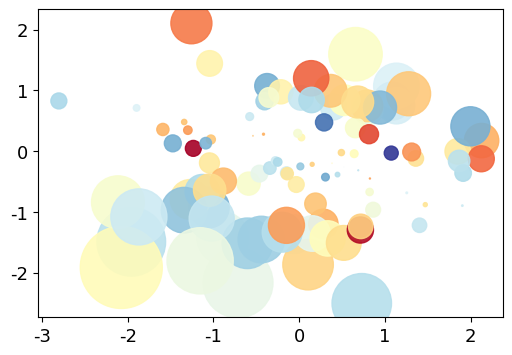

In [21]:
# 增加颜色, 大小, 透明度设置 -- 气泡图

#设置画布大小
plt.figure(figsize = (6, 4))

#设置颜色
colors = np.random.randn(100)

plt.scatter(x, y, 
            #大小
            s = np.power(10*x + 20*y, 2),
            #颜色
            c = colors,
            #标注
            marker = 'o',
            #指定某个colormap值
            cmap=mpl.cm.RdYlBu,
            #透明度
            alpha = 0.9)
plt.show()

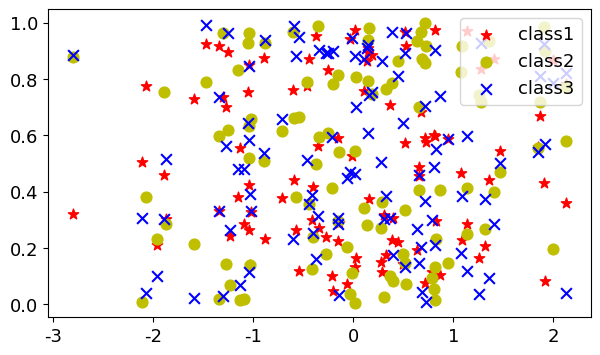

In [23]:
# 散点图分三类并显示图例

#设置画布大小
plt.figure(figsize=(7, 4) )

colors = ['r', 'y', 'b'] #设置颜色
markers = ['*', 'o', 'x'] #设置标注

for i in range(0,3):
    y = np.random.rand(100)
    plt.scatter(x, y, s=60, c=colors[i], marker=markers[i])
plt.legend(['class1', 'class2', 'class3'], loc='upper right')

plt.show()

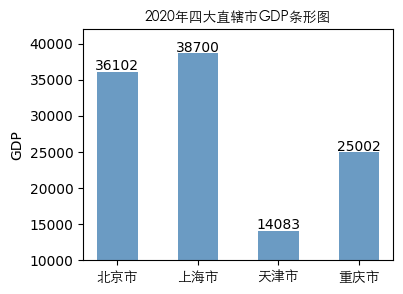

In [5]:
# 条形图: bar(), barh()
# 柱形图, 寻找变量之间的关系
#2020年四大直辖市GDP水平
GDP = [36102,38700,14083,25002]
city = [u'北京市', u'上海市', u'天津市', u'重庆市']

plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize=(4, 3) )
plt.bar(city, GDP, align='center', color='steelblue', alpha=0.8, width=0.5)
plt.ylabel('GDP')
plt.title('2020年四大直辖市GDP条形图', fontproperties=zhfont)
plt.ylim([10000, 42000])
plt.xticks( fontproperties=zhfont)

# 为每个条形图添加数值标签: ha='center'
for x,y in enumerate(GDP):
    plt.text(x, y+200, f'{y}', ha='center')

plt.show()

# plt.bar(x, y, width, color, edgecolor, bottom, linewidth, align, tick_label, align)
# 参数说明: 
# x: 指定x轴上数值
# y: 指定y轴上的数值
# width: 表示条形图的宽度, 取值在0~1之间, 默认为0.8
# color: 条形图的填充色
# edgecolor: 条形图的边框颜色
# bottom: 百分比标签与圆心距离
# linewidth: 条形图边框宽度
# tick_label: 条形图的刻度标签
# align: 指定x轴上对齐方式, "center","lege"边缘


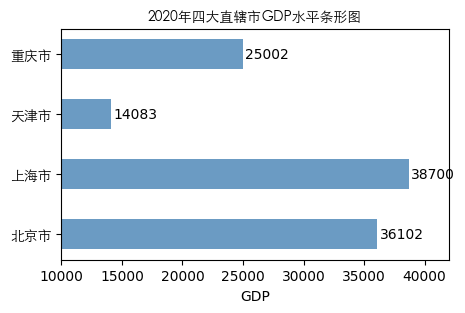

In [9]:
# 简单水平条形图
plt.figure(figsize=(5, 3) )
plt.barh(city, GDP, align='center', color='steelblue', alpha=0.8, height=0.5)
plt.xlabel('GDP')
plt.title(u'2020年四大直辖市GDP水平条形图', fontproperties=zhfont)
plt.xlim([10000, 42000])
plt.yticks( fontproperties=zhfont)

# 为每个条形图添加数值标签: va='center'
for x,y in enumerate(GDP):
    plt.text(y+200, x, f'{y}', va='center')

plt.show()

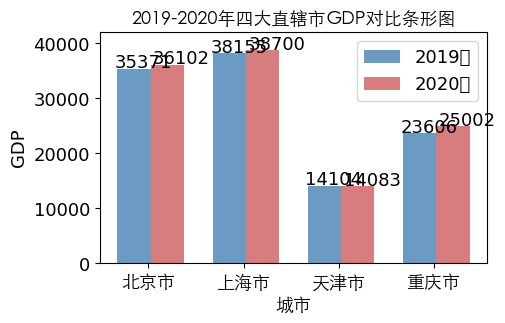

In [12]:
# 簇状条形图
#2019-2020年四大直辖市GDP对比条形图
GDP_2019 = [35371, 38155, 14104, 23606]
GDP_2020 = [36102, 38700, 14083, 25002]
bar_width = 0.35

# 绘图
plt.figure(figsize=(5, 3) )
plt.bar(np.arange(4), GDP_2019, label = '2019年', color = 'steelblue', alpha = 0.8, width = bar_width)
plt.bar(np.arange(4) + bar_width, GDP_2020, label = '2020年', color = 'indianred', alpha = 0.8, width = bar_width)

# 添加轴标签
plt.xlabel('城市', fontproperties = zhfont)
plt.ylabel('GDP')
plt.title('2019-2020年四大直辖市GDP对比条形图', fontproperties = zhfont)

#增加刻度标签
plt.xticks(np.arange(4)+0.15, city, fontproperties = zhfont)

#设置y轴的刻度范围
plt.ylim([0, 42000])

# 为每个条形图添加数值标签
for x2019, y2019 in enumerate(GDP_2019):
    plt.text(x2019-0.2, y2019+100, '%s' %y2019)
for x2020,y2020 in enumerate(GDP_2020):
    plt.text(x2020+0.2, y2020+100, '%s' %y2020)

#显示图例
plt.legend(loc='upper right')

plt.show()

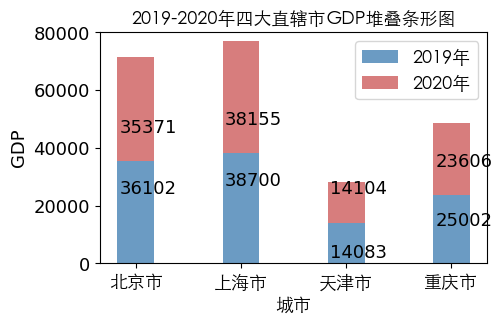

In [13]:
# 堆叠条形图
# 将上面簇状条形图转换成堆叠条形图

# 绘图
plt.figure(figsize=(5, 3) )
plt.bar(city, GDP_2019, label = '2019年', color = 'steelblue', alpha = 0.8, width = bar_width)
plt.bar(city, GDP_2020, label = '2020年', color = 'indianred', alpha = 0.8, width = bar_width, bottom=GDP_2019)

# 添加轴标签
plt.xlabel('城市', fontproperties = zhfont)
plt.ylabel('GDP')
plt.title('2019-2020年四大直辖市GDP堆叠条形图', fontproperties = zhfont)
plt.xticks( fontproperties=zhfont)

#设置y轴的刻度范围
plt.ylim([0, 80000])

# 为每个条形图添加数值标签
for x2019, y2019 in enumerate(GDP_2019):
    plt.text(x2019-0.15, y2019 + 10000, '%s' %y2019)
for x2020,y2020 in enumerate(GDP_2020):
    plt.text(x2020-0.15, y2020 - 12000, '%s' %y2020)

#显示图例
plt.legend(loc='upper right', prop=zhfont)

plt.show()

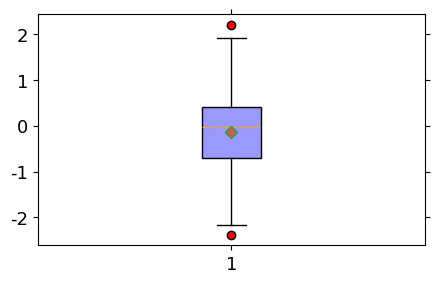

In [14]:
# 箱线图: boxplot()
# 反映数据的异常情况; 主要用于分析数据内部的分布状态或分散状态, 包括上下限/各分位数/异常值; 
#利用numpy库生成100个服从标准正态分布随机数
x = np.random.normal(0,1,100)

plt.figure(figsize=(5, 3) )
plt.boxplot(x,  # 指定绘图数据
           patch_artist = True, # 要求用自定义颜色填充盒形图, 默认白色填充
           showmeans = True, # 以点的形式显示均值
           boxprops = {'color':'black', 'facecolor':'#9999ff'},# 设置箱体属性, 填充色和边框色
           flierprops = {'marker':'o', 'markerfacecolor':'red', 'color':'black'},# 设置异常值属性, 点的形状/填充色和边框色
           meanprops = {'marker':'D', 'markerfacecolor':'indianred'},# 设置均值点的属性, 点的形状/填充色
           medianprops = {'linestyle':'--', 'color':'orange'})# 设置中位数线的属性, 线的类型和颜色

# 去除箱线图的上边框与右边框的刻度标签
plt.tick_params(top = 'off', right = 'off')

plt.show()


# plt.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None)
# 参数说明: 
# x: 指定要绘制箱线图的数据; 
# notch: 是否是凹口的形式展现箱线图, 默认非凹口; 
# sym: 指定异常点的形状, 默认为+号显示; 
# vert: 是否需要将箱线图垂直摆放, 默认垂直摆放; 
# whis: 指定上下须与上下四分位的距离, 默认为1.5倍的四分位差; 
# positions: 指定箱线图的位置, 默认为[0,1,2…]; 
# widths: 指定箱线图的宽度, 默认为0.5; 
# patch_artist: 是否填充箱体的颜色; 
# meanline: 是否用线的形式表示均值, 默认用点来表示; 
# showmeans: 是否显示均值, 默认不显示; 
# showcaps: 是否显示箱线图顶端和末端的两条线, 默认显示; 
# showbox: 是否显示箱线图的箱体, 默认显示; 
# showfliers: 是否显示异常值, 默认显示; 
# boxprops: 设置箱体的属性, 如边框色, 填充色等; 
# boxprops = {'color':'g', 'facecolor':'yellow'}
# 'color' : 'g' 箱子外框的颜色
# 'facecolor' : 'yellow' 箱子填充的颜色
# labels: 为箱线图添加标签, 类似于图例的作用; 
# flierprops: 设置异常值的属性, 如异常点的形状/大小/填充色等; 
# medianprops: 设置中位数的属性, 如线的类型/粗细等; 
# meanprops: 设置均值的属性, 如点的大小/颜色等; 
# capprops: 设置箱线图顶端和末端线条的属性, 如颜色/粗细等; 
# whiskerprops: 设置须的属性, 如颜色/粗细/线的类型等; 


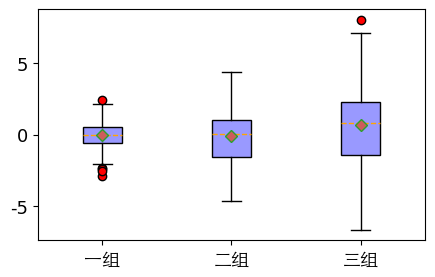

In [16]:
# 绘制不同分组的箱线图
#利用 numpy库生成三组正态分布随机数
x = [np.random.normal(0,std,100) for std in range(1,4)]

# 绘图
plt.figure(figsize=(5, 3) )
plt.boxplot(x, 
            patch_artist = True,
            labels = ['一组','二组','三组'], # 添加具体的标签名称
            showmeans=True, 
            boxprops = {'color':'black','facecolor':'#9999ff'}, 
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'},
            meanprops = {'marker':'D','markerfacecolor':'indianred'},
            medianprops = {'linestyle':'--','color':'orange'})

plt.xticks( fontproperties=zhfont)
# 显示图形
plt.show()

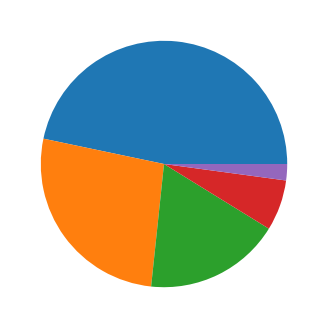

In [18]:
# 绘制最简单的饼图
# 表示离散变量各水平占比情况
x = [9823, 5601, 3759, 1400, 450]
plt.figure(figsize=(4, 4) )
plt.pie(x)
plt.show()

# plt.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False)
# 参数说明: 
# x: 指定绘图的数据
# explode: 指定饼图某些部分的突出显示, 即呈现爆炸式
# labels: 为饼图添加标签说明, 类似于图例说明
# colors: 指定饼图的填充色
# autopct: 自动添加百分比显示, 可以采用格式化的方法显示
# pctdistance: 设置百分比标签与圆心的距离
# shadow: 是否添加饼图的阴影效果
# labeldistance: 设置各扇形标签(图例)与圆心的距离; 
# startangle: 设置饼图的初始摆放角度; 
# radius: 设置饼图的半径大小; 
# counterclock: 是否让饼图按逆时针顺序呈现; 
# wedgeprops: 设置饼图内外边界的属性, 如边界线的粗细/颜色等; 
# textprops: 设置饼图中文本的属性, 如字体大小/颜色等; 
# center: 指定饼图的中心点位置, 默认为原点
# frame: 是否要显示饼图背后的图框, 如果设置为True的话, 需要同时控制图框x轴/y轴的范围和饼图的中心位置; 

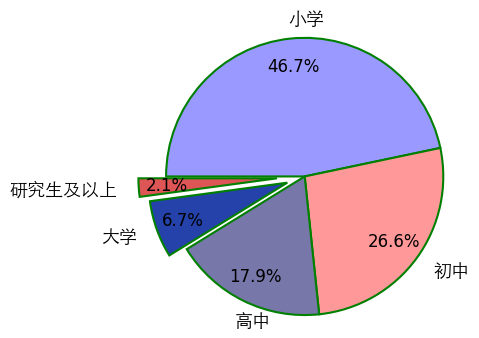

In [21]:
# 为饼图添加一些参数
#构造数据: 某城镇受教育程度
education = [9823, 5601, 3759, 1400, 450]
labels = ['小学', '初中', '高中', '大学', '研究生及以上']

explode = [0,0,0,0.2,0.3]  # 用于突出显示特定人群
colors=['#9999ff','#ff9999','#7777aa','#2442aa','#dd5555'] # 自定义颜色

# 将横/纵坐标轴标准化处理, 保证饼图是一个正圆, 否则为椭圆
plt.figure(figsize=(3, 3) )
plt.axes(aspect='equal')

# 绘制饼图
pp = plt.pie(x = education, # 绘图数据
        explode=explode, # 突出显示特定人群
        labels=labels, # 添加教育水平标签
        colors=colors, # 设置饼图的自定义填充色
        autopct='%.1f%%', # 设置百分比的格式, 这里保留一位小数
        pctdistance=0.8,  # 设置百分比标签与圆心的距离
        labeldistance = 1.15, # 设置教育水平标签与圆心的距离
        startangle = 180, # 设置饼图的初始角度
        radius = 1.5, # 设置饼图的半径
        counterclock = False, # 是否逆时针, 这里设置为顺时针方向
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'},# 设置饼图内外边界的属性值
        textprops = {'fontsize':12, 'color':'k'}, # 设置文本标签的属性值
        center = (1.8,1.8), # 设置饼图的原点
        frame = 0 )# 是否显示饼图的图框, 这里设置不显示

# 删除x轴和y轴的刻度
plt.xticks(())
plt.yticks(())

for front in pp[1]:
    front.set_fontproperties(zhfont)

# 显示图形
plt.show()

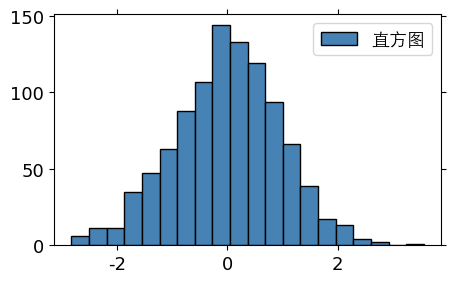

In [23]:
# 绘制简单频数直方图
# 判定数据的分布情况
data = np.random.randn(1000)

plt.figure(figsize=(5, 3) )
plt.hist(data, # 绘图数据
        bins = 20, # 指定直方图的条形数为20个
        color = 'steelblue', # 指定填充色
        edgecolor = 'k', # 指定直方图的边界色
        label = '直方图' )# 为直方图呈现标签

# 去除图形顶部边界和右边界的刻度
plt.tick_params(top='off', right='off')
# 显示图例
plt.legend(prop=zhfont)
# 显示图形
plt.show()

# plt.hist(x, bins=10, range=None, normed=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False)
# 参数说明: 
# x: 指定要绘制直方图的数据; 
# bins: 指定直方图条形的个数; 
# range: 指定直方图数据的上下界, 默认包含绘图数据的最大值和最小值; 
# density: 是否将直方图的频数转换成频率; 
# weights: 该参数可为每一个数据点设置权重; 
# cumulative: 是否需要计算累计频数或频率; 
# bottom: 可以为直方图的每个条形添加基准线, 默认为0; 
# histtype: 指定直方图的类型, 默认为bar, 除此还有'barstacked', 'step', 'stepfilled'; 
# align: 设置条形边界值的对其方式, 默认为mid, 除此还有'left'和'right'; 
# orientation: 设置直方图的摆放方向, 默认为垂直方向; 
# rwidth: 设置直方图条形宽度的百分比; 
# log: 是否需要对绘图数据进行log变换; 
# color: 设置直方图的填充色; 
# label: 设置直方图的标签, 可通过legend展示其图例; 
# stacked: 当有多个数据时, 是否需要将直方图呈堆叠摆放, 默认水平摆放; 

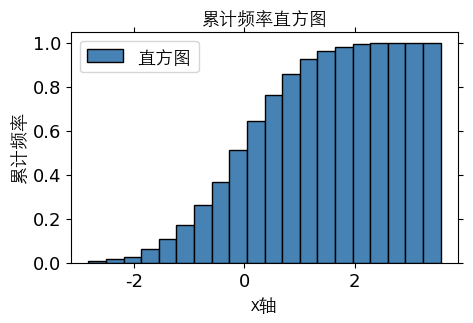

In [24]:
# 绘制累计频率直方图
plt.figure(figsize=(5, 3) )
plt.hist(data, # 绘图数据
        bins = 20, # 指定直方图的组距
        density = True, # 设置为频率直方图
        cumulative = True, # 积累直方图
        color = 'steelblue', # 指定填充色
        edgecolor = 'k', # 指定直方图的边界色
        label = '直方图')# 为直方图呈现标签

# 设置坐标轴标签和标题
plt.title('累计频率直方图', fontproperties = zhfont)
plt.xlabel('x轴', fontproperties = zhfont)
plt.ylabel('累计频率', fontproperties = zhfont)

# 去除图形顶部边界和右边界的刻度
plt.tick_params(top='off', right='off')

# 显示图例
plt.legend(loc = 'best', prop=zhfont)
# 显示图形
plt.show()

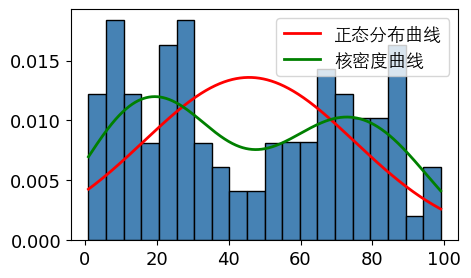

In [25]:
#  在直方图基础上, 添加正态分布曲线和核密度曲线
#设置随机种子
np.random.seed(1)

#随机生成100个1-100之间的整数
data = np.random.randint(1, 100, 100)

# 正态分布图
plt.figure(figsize=(5, 3) )
plt.hist(data, # 绘图数据
        bins = 20, # 指定直方图的组距
        density = True, # 设置为频率直方图
        color = 'steelblue', # 指定填充色
        edgecolor = 'k') # 指定直方图的边界色

# 生成正态曲线的数据
x1 = np.linspace(data.min(), data.max(), 1000)
normal = norm.pdf(x1, data.mean(), data.std())
# 绘制正态分布曲线
line1, = plt.plot(x1, normal, 'r-', linewidth = 2) 

# 生成核密度曲线的数据
kde = mlab.GaussianKDE(data)
x2 = np.linspace(data.min(), data.max(), 1000)
# 绘制核密度曲线
line2, = plt.plot(x2,kde(x2), 'g-', linewidth = 2)

# 显示图例
plt.legend([line1, line2], ['正态分布曲线','核密度曲线'], loc='best', prop=zhfont)

# 显示图形
plt.show()

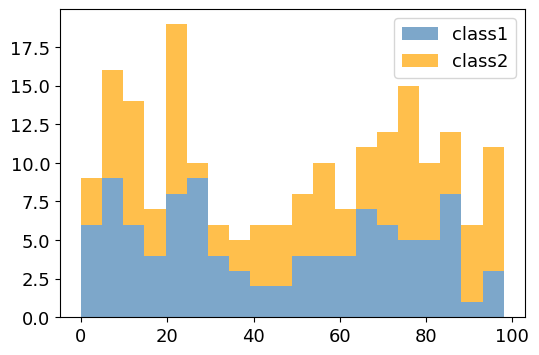

In [28]:
# 绘制堆叠直方图
#设置随机种子
np.random.seed(1)

#利用 numpy库生成两组随机数
data = [np.random.randint(0, 100, 100) for i in range(1,3)]

plt.figure(figsize=(6,4) )

# 绘制堆叠直方图
plt.hist(data, bins = 20, label = ['class1', 'class2'], color = ['steelblue','orange'], alpha = 0.7, stacked = True)

# 显示图例
plt.legend()
# 显示图形
plt.show()

(array([3., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 10 artists>)

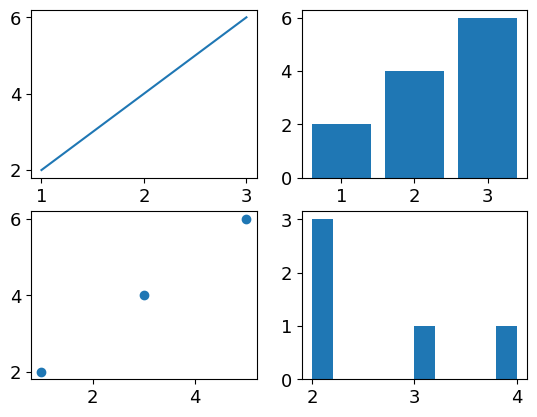

In [29]:
# 多次绘制多图 subplot()函数
# 绘制第一个子图: 折线图
ax1 = plt.subplot(221)  
plt.plot([1, 2, 3], [2, 4, 6])
# 绘制第二个子图: 柱状图
ax2 = plt.subplot(222)  
plt.bar([1, 2, 3], [2, 4, 6])
# 绘制第三个子图: 散点图
ax3 = plt.subplot(223)  
plt.scatter([1, 3, 5], [2, 4, 6])
# 绘制第四个子图: 直方图
ax4 = plt.subplot(224)
plt.hist([2, 2, 2, 3, 4])

# 1.在一张画布上输出多个图形,在Matplotlib库中有当前的图形(figure)以及当前轴(axes)概念
# 2.其对应的就是当前画布以及当前子图, 在一张画布(figure)上可以绘制多个子图(axes)
# 3.绘制多图通常采用subplot()函数或subplots()函数
# (1)subplot()函数, 通常含有三个参数, 子图的行数/列数以及第几个子图
# 不足: 每次在新的子图上画图时, 都得调用subplot()函数
# (2)subplots()函数,一次性就生成多个子图
# set_title()函数 子图中设置子图标题
# set_xlabel()函数 子图中设置X轴标签
# set_ylabel()函数 子图中设置Y轴标签

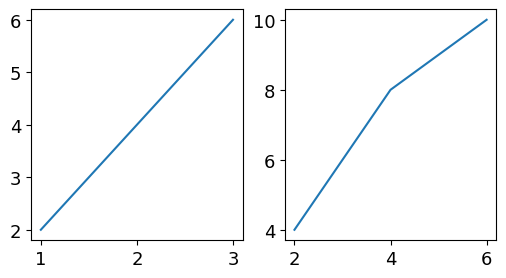

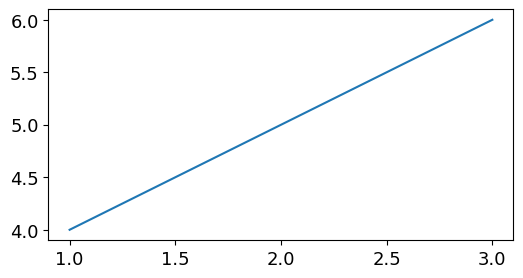

In [6]:
# 不同画布分开绘制
# 第一张画布
plt.figure(1, figsize=(6,3)) 
ax1 = plt.subplot(121)  # 第一张画布的第一个子图
plt.plot([1, 2, 3], [2, 4, 6])  

ax2 = plt.subplot(122)  # 第一张画布的第二个子图
plt.plot([2, 4, 6], [4, 8, 10])

# 第二张画布
plt.figure(2, figsize=(6,3) )
plt.plot([1, 2, 3], [4, 5, 6]);

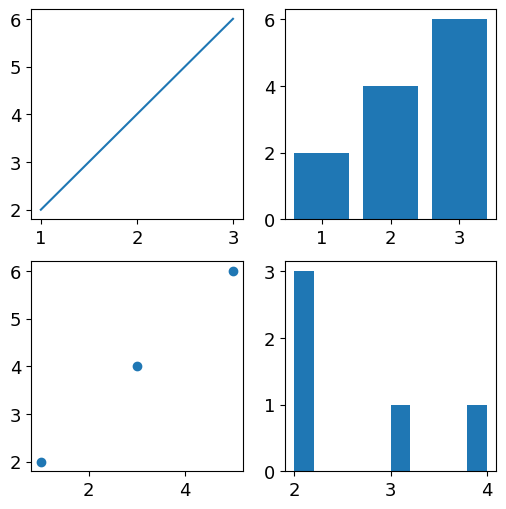

In [7]:
# 一次绘制多图 subplots()函数
fig, axes = plt.subplots(2, 2, figsize=(6, 6)) 
ax1, ax2, ax3, ax4 = axes.flatten()
ax1.plot([1, 2, 3], [2, 4, 6])     # 绘制第一个子图
ax2.bar([1, 2, 3], [2, 4, 6])      # 绘制第二个子图
ax3.scatter([1, 3, 5], [2, 4, 6])  # 绘制第三个子图
ax4.hist([2, 2, 2, 3, 4]);         # 绘制第四个子图


Text(0, 0.5, '分数')

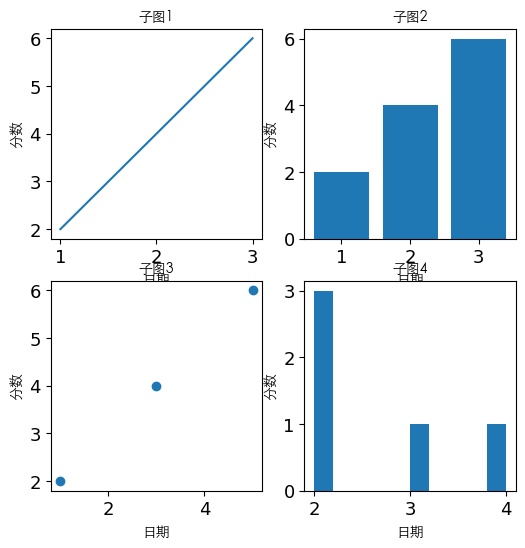

In [8]:
# 添加横纵轴名称及标题

fig, axes = plt.subplots(2, 2, figsize=(6, 6)) 
ax1, ax2, ax3, ax4 = axes.flatten()
ax1.plot([1, 2, 3], [2, 4, 6])     # 绘制第一个子图
ax1.set_title('子图1', fontproperties = zhfont)
ax1.set_xlabel('日期', fontproperties = zhfont)
ax1.set_ylabel('分数', fontproperties = zhfont)
ax2.bar([1, 2, 3], [2, 4, 6])      # 绘制第二个子图
ax2.set_title('子图2', fontproperties = zhfont)
ax2.set_xlabel('日期', fontproperties = zhfont)
ax2.set_ylabel('分数', fontproperties = zhfont)
ax3.scatter([1, 3, 5], [2, 4, 6])  # 绘制第三个子图
ax3.set_title('子图3', fontproperties = zhfont)
ax3.set_xlabel('日期', fontproperties = zhfont)
ax3.set_ylabel('分数', fontproperties = zhfont)
ax4.hist([2, 2, 2, 3, 4])         # 绘制第四个子图
ax4.set_title('子图4', fontproperties = zhfont)
ax4.set_xlabel('日期', fontproperties = zhfont)
ax4.set_ylabel('分数', fontproperties = zhfont)


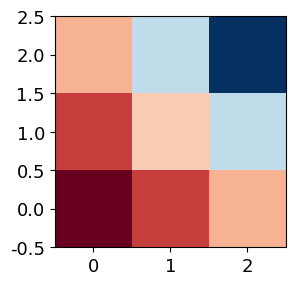

In [12]:
# 绘制简单随机矩阵图
# 首先生成一个 3x3 的 2D-array , 也就是三行三列的格子, array 中的每个值经过colormap与一个颜色对应并填充在格子中
a = np.array([0.313660827978, 0.365348418405, 0.423733120134,
              0.365348418405, 0.439599930621, 0.525083754405,
              0.423733120134, 0.525083754405, 0.651536351379]).reshape(3,3)
plt.figure(figsize=(3,3) )
plt.imshow(a, 
           #画图方式
           interpolation='nearest', 
           #指定某个colormap值
           cmap='RdBu', 
           #选择原点的位置
           origin='lower')

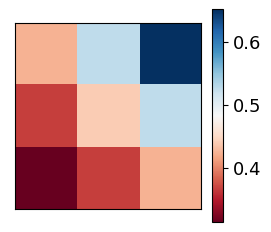

In [13]:
# 随机矩阵图添加colorbar
# 为我们显示不同颜色的区块所对应的具体数值. 其中shrink参数可以用来调整 colorbar 的长度, 这里我们使colorbar的长度变短为原来的92%
plt.figure(figsize=(3,3) )
plt.imshow(a, interpolation='nearest', cmap='RdBu', origin='lower')
plt.colorbar(shrink=.92)

plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
# 图表动态刷新: ion()和ioff()
# 交互模式:  我们在训练模型的时候, 可能需要去不停去更新图表数据; 
# jupyter中动态显示需要
from IPython import display

x, y1, y2 = [], [], []
plt.ion()    # 交互模式打开
for i in np.linspace(0,10,50):
    x.append(i)
    y1.append(np.cos(i))
    y2.append(np.sin(i))
    plt.figure(figsize=(12, 2))
    plt.clf()   
    plt.ylim(-1, 1)    # 设置y轴刻度值最大最小值
    plt.plot(x, y1, '--r')
    plt.plot(x, y2, 'g')
    plt.pause(0.1)
    display.clear_output(wait=True)    # 清除输出
plt.ioff()   # 关闭交互模式


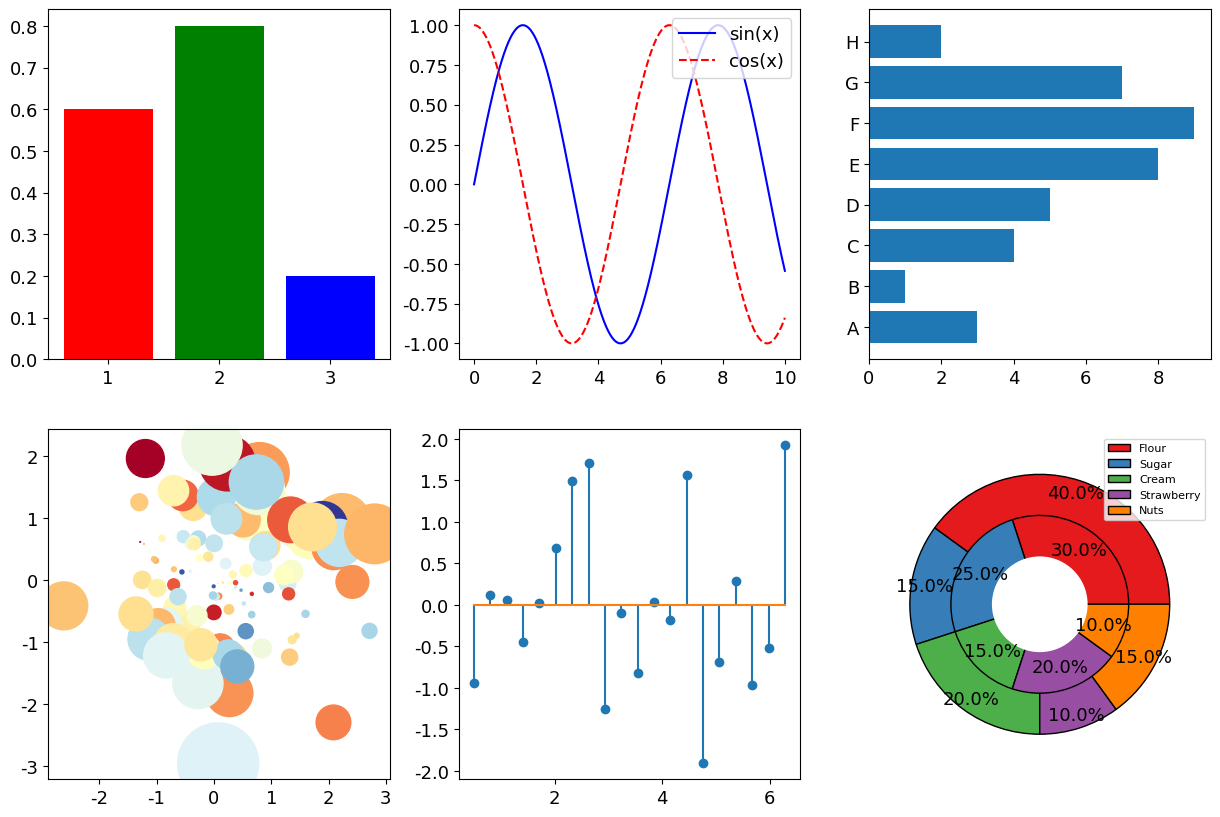

In [15]:
# 绘制多个统计图形的组合展示
# (1)生成两行三列15×10的6个子图; 
# (2)第一个子图: 
# 数据: x=[1, 2, 3]; y=[0.6, 0.8, 0.2];
# 图形: 设置三种不同颜色, 绘制条形图; 
# (3)第二个子图: 
# 绘制sin(x)和cos(x)的图像; 
# 样式: 
# 横轴设为'x', 纵轴设为'f(x)'; 
# 添加图例: sin(x)和cos(x);
# 颜色不同, 线型不同; 
# 图形: 绘制线图; 
# (4)第三个子图: 
# 数据: x=[1,2,3,4,5,6,7,8]; y= [3,1,4,5,8,9,7,2]
# 样式: 
# 纵轴标签设为: ['A','B','C','D','E','F','G','H']
# 图形: 绘制水平条形图; 
# (5)第四个子图: 
# 生成两组服从正态分布的100个随机数,设为x,y; 
# 样式: 
# 颜色主题: 采用mpl.cm.RdYlBu; 
# 标注: 采用'o'; 
# 图形: 绘制气泡图; 
# # (6)第五个子图: 
# 数据: 
# x = np.linspace(0.5,2*np.pi,20)
# y = np.random.randn(20)
# 样式: 
# 棉棒样式: '-.';
# 棉棒末端的样式:'o';
# 指定基线的样式:'-';
# 图形: 绘制棉棒图; 
# (7)第六个子图: 
# 数据: 
# elements = ["Flour","Sugar","Cream","Strawberry","Nuts"]
# weight1 = [40,15,20,10,15]
# weight2 = [30,25,15,20,10]
# 样式: 
# 颜色设为: ["#e41a1c","#377eb8","#4daf4a","#984ea3","#ff7f00"]
# 百分数保留一位小数; 
# 其他参数自行发挥; 
# 图形: 绘制双层环形图; 

fig, axes = plt.subplots(2, 3, figsize=(15, 10)) 
# fig1
axes[0,0].bar([1, 2, 3],[0.6, 0.8, 0.2], color=['r','g','b'])
# fig2
x = np.linspace(0,10,500)
axes[0,1].plot(x, np.sin(x),color='b',linestyle='-', label='sin(x)')
axes[0,1].plot(x, np.cos(x),color='r',linestyle='--', label='cos(x)')
axes[0,1].legend(loc='upper right')
# fig3
axes[0,2].barh([1,2,3,4,5,6,7,8],[3,1,4,5,8,9,7,2], tick_label=['A','B','C','D','E','F','G','H'])
# fig4
x= np.random.randn(100)
y= np.random.randn(100)
axes[1,0].scatter(
            x,
            y,
            s = np.power(10*x + 20*y, 2),
            marker = 'o',
            c=np.random.randn(100),
            cmap=mpl.cm.RdYlBu,)
# fig5
axes[1,1].stem(np.linspace(0.5,2*np.pi,20),np.random.randn(20),linefmt='-',markerfmt='o',basefmt='-')
# fig6
elements = ["Flour","Sugar","Cream","Strawberry","Nuts"]
weight1 = [40,15,20,10,15]
weight2 = [30,25,15,20,10]
color = ["#e41a1c","#377eb8","#4daf4a","#984ea3","#ff7f00"]
axes[1,2].pie(weight1, radius=0.95,autopct='%1.1f%%',pctdistance=0.9, colors=color,wedgeprops={'edgecolor':'black'})
axes[1,2].pie(weight2, radius=0.65,autopct='%1.1f%%',pctdistance=0.75, colors=color,wedgeprops={'edgecolor':'black'})
axes[1,2].pie([1], radius=0.35, colors=['white'])  # 仅用来形成中空的假象
axes[1,2].legend(elements, fontsize=8)
# 大工告成, 显示所有图
plt.show()

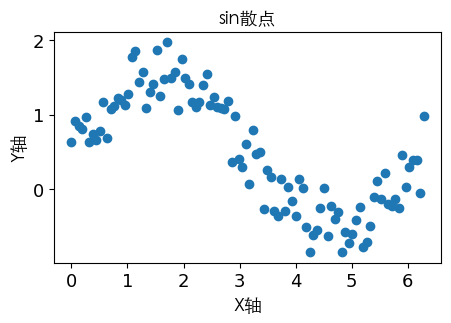

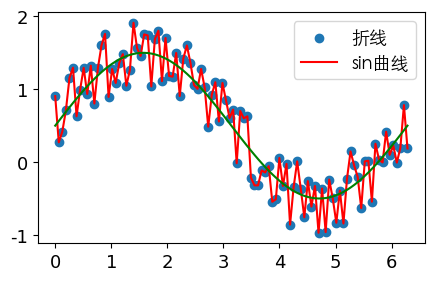

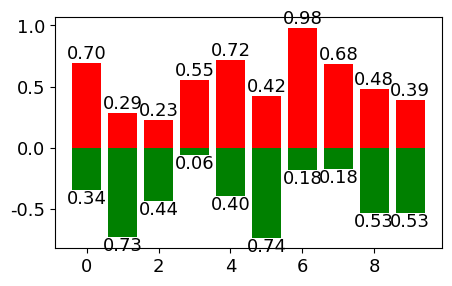

<Figure size 500x300 with 0 Axes>

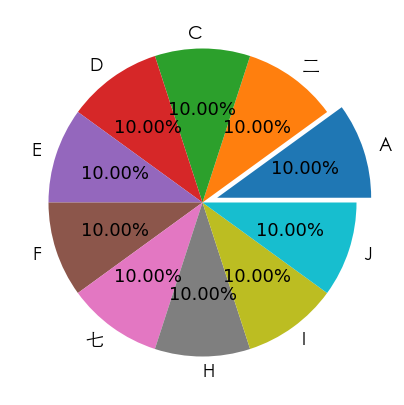

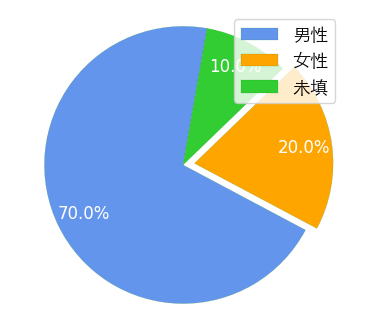

In [38]:
# VIII. 数据可视化 matplotlib.pyplot
# -*- coding: UTF-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import warnings

from matplotlib import font_manager	 # matplotlib中 中文设置模块

#中文字体路径(先看好自己电脑中的路径)
zhfont = font_manager.FontProperties(fname = '/usr/share/fonts/truetype/cn/SimHei.ttf')
# title()/xlabel()/ylabel()中设置字体的参数为fontproperties, legend()设置字体参数为prop


# plt.rcParams['font.sans-serif']=['SimHei']###解决中文乱码
# plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

warnings.filterwarnings('ignore')
# plt.rcParams['font.sans-serif']=['Microsoft YaHei'] # 用来正常显示中文标签 SimHei 
# plt.rcParams['font.family']=['Microsoft YaHei']
# plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 1. 绘制散点图
x=np.linspace(0,2*np.pi,100)
y=np.sin(x)+np.random.random(len(x))

# plt.rcParams['font.sans-serif']=['SimHei'] # 解决中文乱码
# plt.rcParams['axes.unicode_minus']=False

plt.figure(figsize=(5, 3) )
plt.xlabel('X轴', fontproperties = zhfont) # , fontproperties = zhfont
plt.ylabel('Y轴', fontproperties = zhfont)

plt.title('sin散点', fontproperties=zhfont)
plt.scatter(x,y)
plt.show()


# 2. 绘制折线图
x=np.linspace(0,2*np.pi,100)
y=np.sin(x)+np.random.rand(100)
plt.figure(figsize=(5, 3) )
plt.scatter(x,y)
plt.plot(x,y,'r')
plt.plot(x,np.sin(x)+0.5,'g')
plt.legend(['折线','sin曲线'], prop=zhfont)
plt.show()


# 3. 绘制柱状图
x=range(10)
np.random.seed(123)
y1=np.random.random(10)
y2=np.random.random(10)

plt.figure(figsize=(5, 3) )
plt.bar(x,y1,facecolor='r')
plt.bar(x,-y2,facecolor='g')

for i,j in zip(x,y1):
    plt.text(i,j,'%.2f'%j,ha='center',va='bottom')

for i,j in zip(x,y2):
    plt.text(i,-j,'%.2f'%j,ha='center',va='top')

plt.show()


# 3. 绘制饼图
z=np.ones(10)
plt.figure(figsize=(5, 3) )
plt.figure(figsize=(5,5))
pp = plt.pie(z,autopct='%.2f%%',explode=[0.1]+[0]*9,labels=list('A二CDEF七HIJ'),labeldistance=1.1)

for front in pp[1]:
    front.set_fontproperties(zhfont)
    
plt.show()


# plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # SimHei 'Microsoft YaHei'

labels = [u'男性', u'女性', u'未填']
# sizes = [male, female, other]
sizes = [70, 20, 10]
colors = ['cornflowerblue', 'orange', 'limegreen']
explode = (0, 0.1, 0)

fig1, ax1 = plt.subplots(figsize=(4, 4))
pa = ax1.pie(sizes,
        explode=explode, # 指定饼图某些部分的突出显示
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',  # 百分比的格式 '%.2f%%'  '%1.1f%%'
        shadow=False, # 去掉了阴影shadow=True
        pctdistance = 0.8,  # 百分比标签与圆心的距离
        labeldistance = 1.1,  # 水平标签与圆心的距离
        startangle = 80,    # 饼图的初始角度 80 180
        radius = 1.2,    # 饼图的半径
        counterclock = True,    # 逆时针True, 顺时针方向False
        wedgeprops = {'linewidth' : 0.1, 'edgecolor' : 'green'},  # 饼图内外边界的属性值
        textprops={'fontsize': 12, 'color': 'w'},  # 文本标签的属性值, 白色
        )
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper right', prop=zhfont) # 关键就是在于这里: 添加一个图例

for front in pa[1]:
    front.set_fontproperties(zhfont)

plt.show()


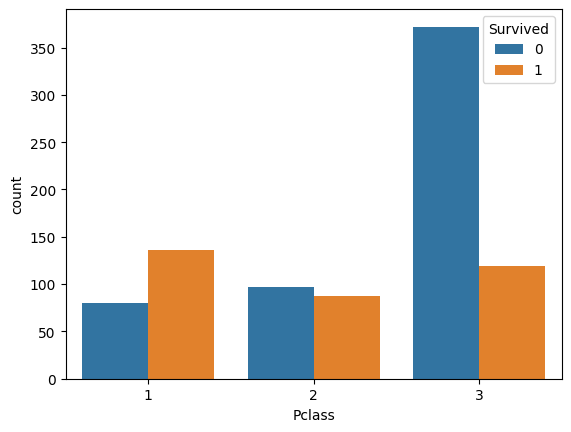

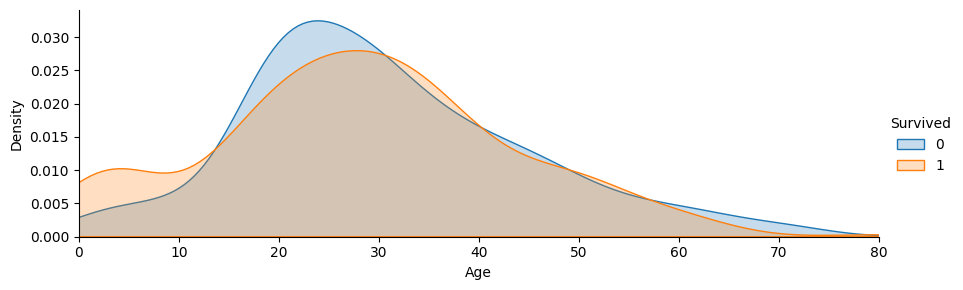

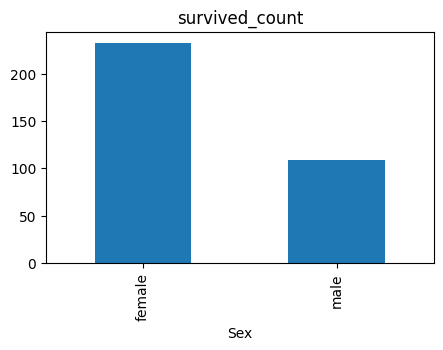

<Figure size 500x300 with 0 Axes>

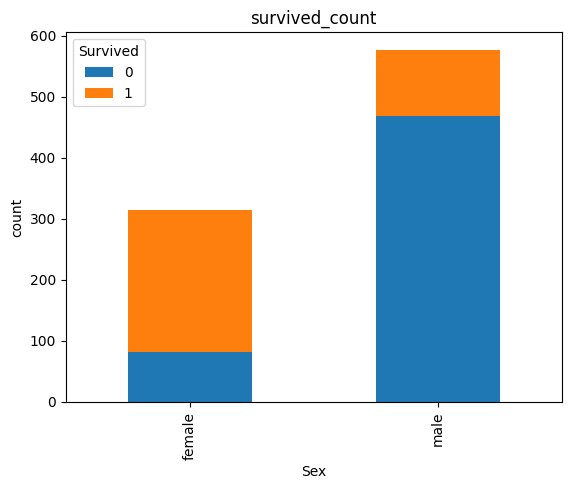

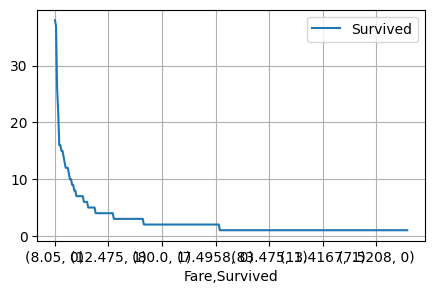

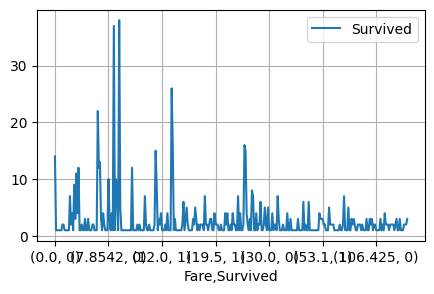

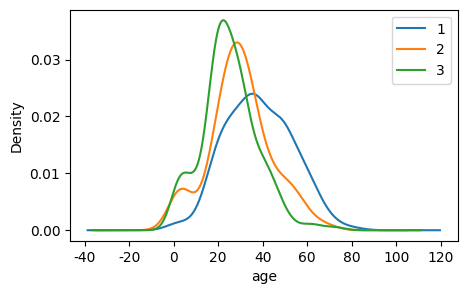

In [13]:
text = pd.read_csv('https://raw.githubusercontent.com/datawhalechina/hands-on-data-analysis/master/%E7%AC%AC%E4%BA%8C%E7%AB%A0%E9%A1%B9%E7%9B%AE%E9%9B%86%E5%90%88/result.csv') # 

sex = text.groupby('Sex')['Survived'].sum()
plt.figure(figsize=(5,3))
sex.plot.bar(width=0.4)
plt.title('survived_count')
plt.show()

# 计算男女中死亡人数 1表示生存, 0表示死亡
plt.figure(figsize=(5,3))
text.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar',stacked='True')
plt.title('survived_count') 
plt.ylabel('count')

# 计算不同票价中生存与死亡人数 1表示生存, 0表示死亡
fare_sur = text.groupby(['Fare'])['Survived'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(5,3))
fare_sur.plot(grid=True)
plt.legend()
plt.show()

# 排序前绘折线图
fare_sur1 = text.groupby(['Fare'])['Survived'].value_counts()
plt.figure(figsize=(5,3))
fare_sur1.plot(grid=True)
plt.legend()
plt.show()

# 不同仓位等级的人年龄分布情况. (用折线图试试)
plt.figure(figsize=(5,3))
text.Age[text.Pclass == 1].plot(kind='kde')
text.Age[text.Pclass == 2].plot(kind='kde')
text.Age[text.Pclass == 3].plot(kind='kde')
plt.xlabel("age")
plt.legend((1,2,3),loc="best")
plt.show()

# 不同仓位等级的人生存和死亡人员的分布情况. (用柱状图试试) 1表示生存, 0表示死亡
pclass_sur = text.groupby(['Pclass'])['Survived'].value_counts()
sns.countplot(x="Pclass", hue="Survived", data=text)

# 不同年龄的人生存与死亡人数分布情况. (不限表达方式)
facet = sns.FacetGrid(text, hue="Survived",aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, text['Age'].max()))
facet.add_legend()


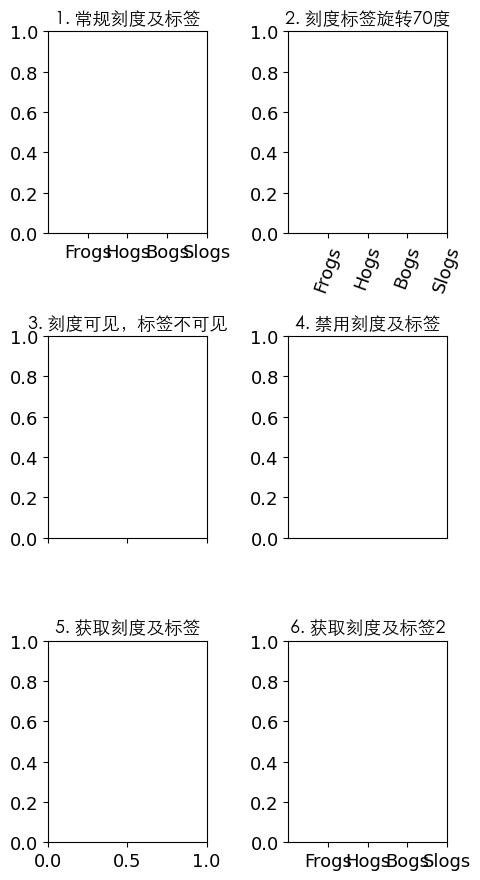

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family']='simhei'
plt.rcParams['axes.unicode_minus']=False

x=[1,2,3,4]
labels =  ['Frogs', 'Hogs', 'Bogs', 'Slogs']

plt.figure(figsize=(5,9))

plt.subplot(321)
plt.xticks(x, labels)
plt.title('1. 常规刻度及标签', fontproperties=zhfont)

plt.subplot(322)
plt.xticks(x, labels, rotation=70)
plt.title('2. 刻度标签旋转70度', fontproperties=zhfont)

plt.subplot(323)
plt.xticks(visible=False)
plt.title('3. 刻度可见, 标签不可见', fontproperties=zhfont)

plt.subplot(324)
plt.xticks([])
plt.title('4. 禁用刻度及标签', fontproperties=zhfont)

plt.subplot(325)
foo = plt.xticks()
plt.title('5. 获取刻度及标签', fontproperties=zhfont)
# print("xticks()刻度标签为",foo)

plt.subplot(326)
bar = plt.xticks(x, labels)
plt.title('6. 获取刻度及标签2', fontproperties=zhfont)
# print("xticks(x, labels)刻度标签为",bar)

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

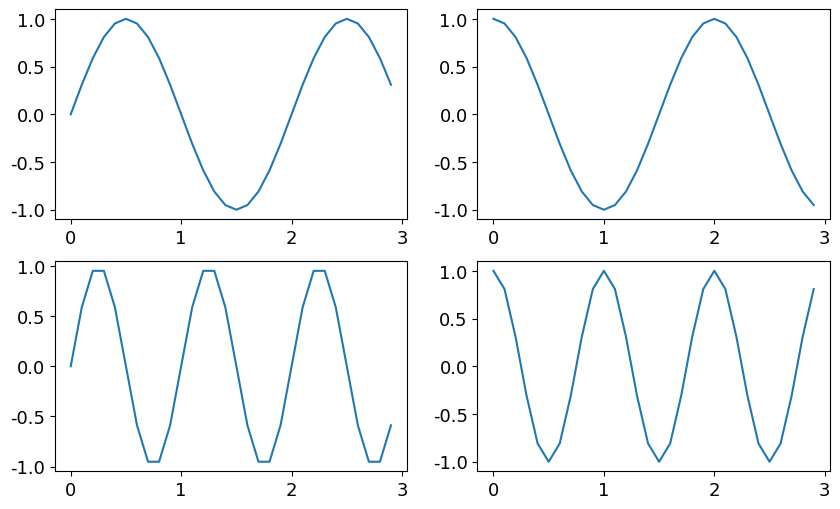

In [36]:
# 设置数据
x = np.arange(0, 3, 0.1)
y1 = np.sin(np.pi*x)
y2 = np.cos(np.pi*x)
y3 = np.sin(2*np.pi*x)
y4 = np.cos(2*np.pi*x)

# 创建figure
plt.figure(figsize = (10,6), facecolor = 'r', edgecolor = 'y')

# 划分子图
fig,axes=plt.subplots(2,2, figsize=(10, 6))
ax1=axes[0,0]
ax2=axes[0,1]
ax3=axes[1,0]
ax4=axes[1,1]

# 绘制4 个子图
ax1.plot(x, y1)
ax2.plot(x, y2)
ax3.plot(x, y3)
ax4.plot(x, y4)
plt.show()

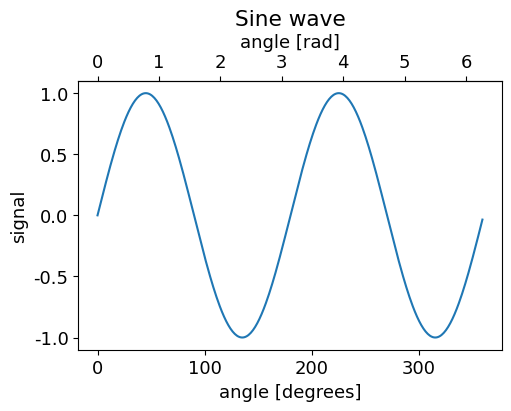

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

fig, ax = plt.subplots(constrained_layout=True, figsize=(5, 4))
x = np.arange(0, 360, 1)
y = np.sin(2 * x * np.pi / 180)

ax.plot(x, y)
ax.set_xlabel('angle [degrees]')
ax.set_ylabel('signal')
ax.set_title('Sine wave')

def deg2rad(x):
    return x * np.pi / 180

def rad2deg(x):
    return x * 180 / np.pi

secax = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg))
secax.set_xlabel('angle [rad]')
plt.show()


/tmp/ipykernel_3762/1561486216.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = True, axis = 'both', color = 'red', linestyle = '-', linewidth = 3)
/tmp/ipykernel_3762/1561486216.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = 1, axis='y', c = 'y', ls = '--')


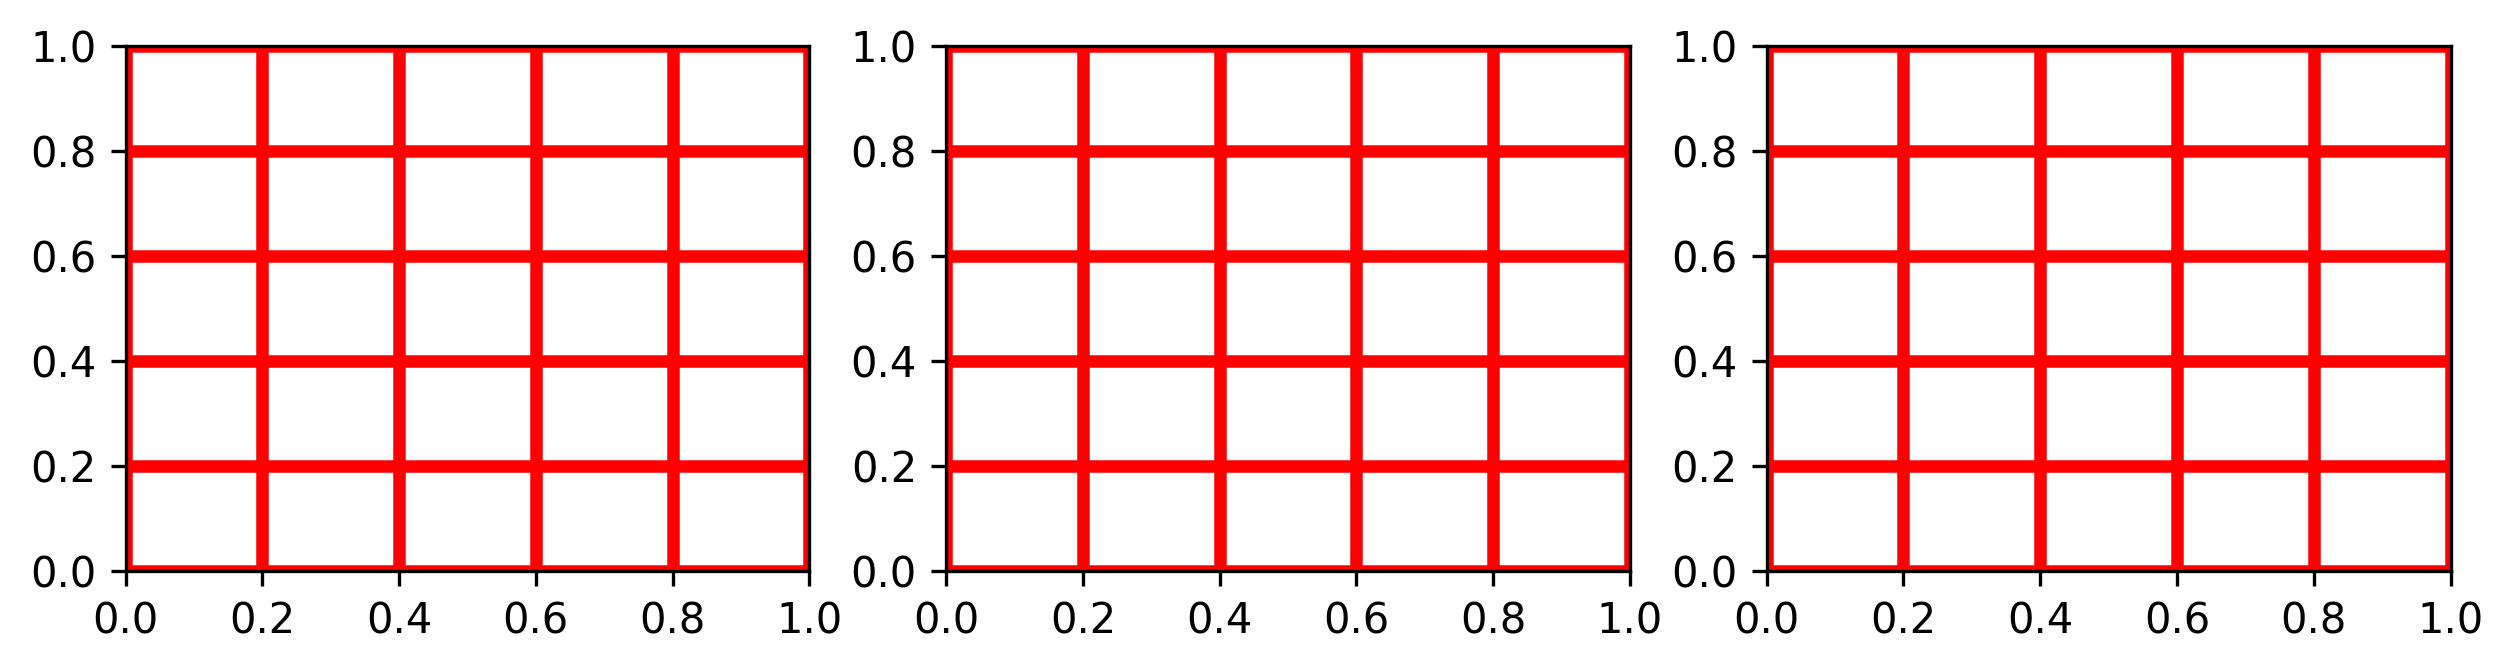

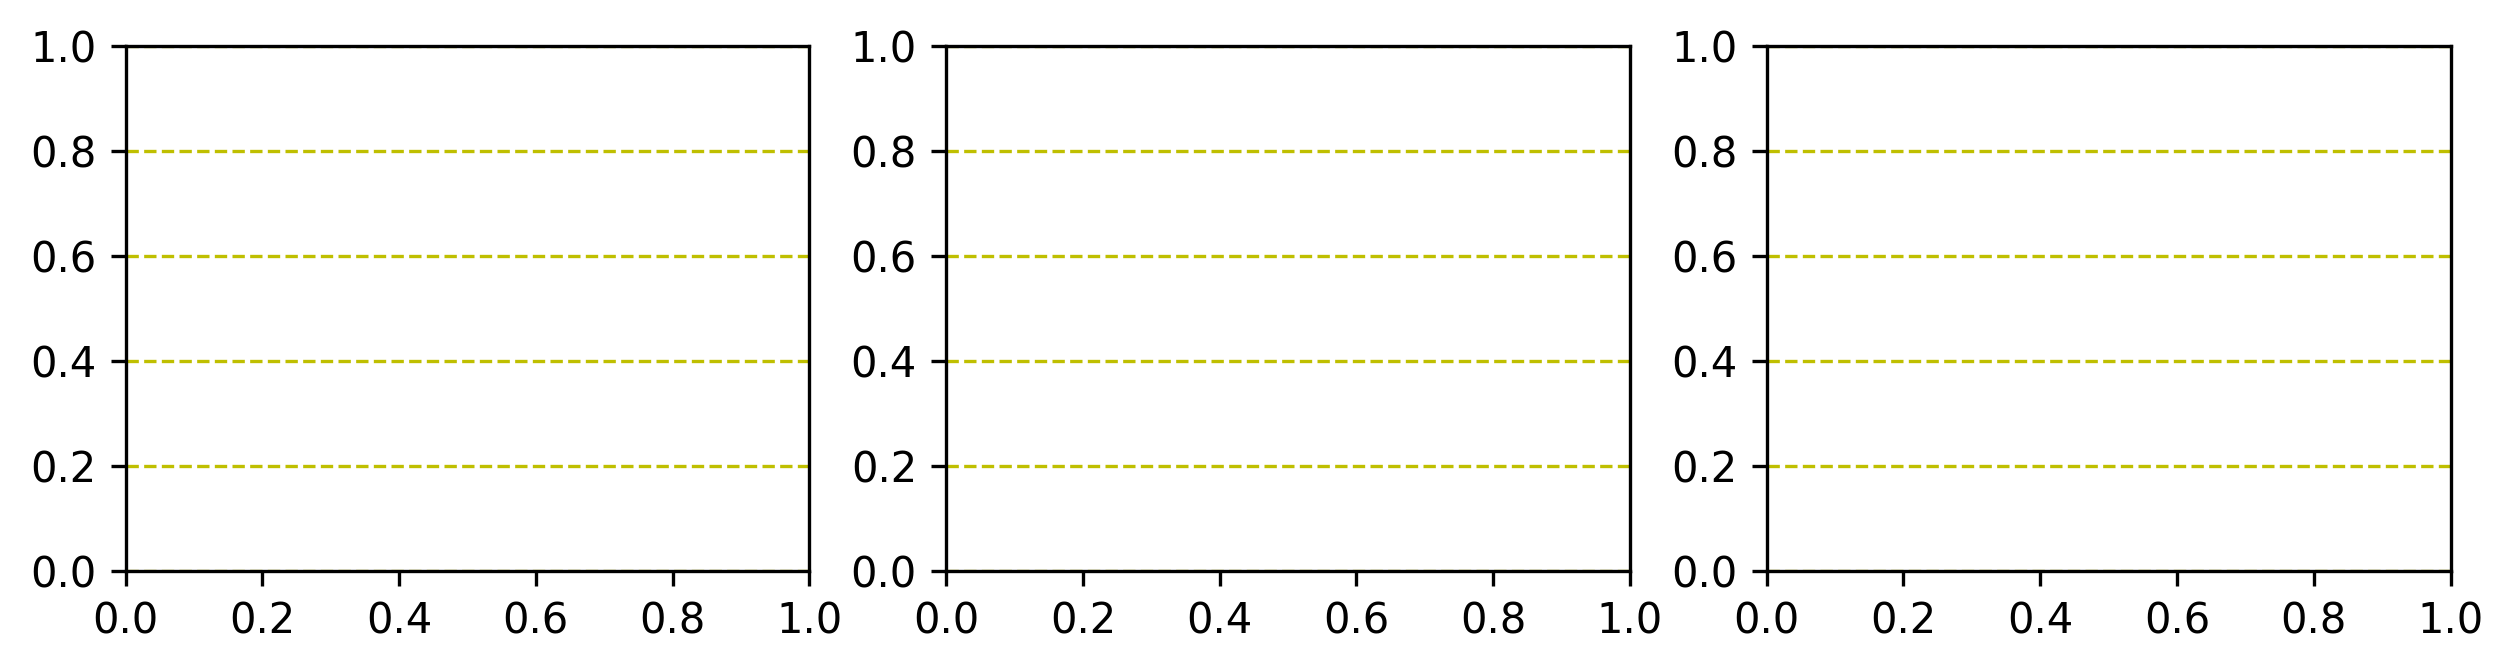

In [21]:
plt.figure(figsize = (10,5))
for i in range(3):
    plt.subplot(2,3,i+1)
    plt.grid(b = True, axis = 'both', color = 'red', linestyle = '-', linewidth = 3)


plt.figure(figsize = (10,5))
for i in range(3):
    plt.subplot(2,3,i+1)
    plt.grid(b = 1, axis='y', c = 'y', ls = '--')
    
    

findfont: Font family ['simhei'] not found. Falling back to DejaVu Sans.


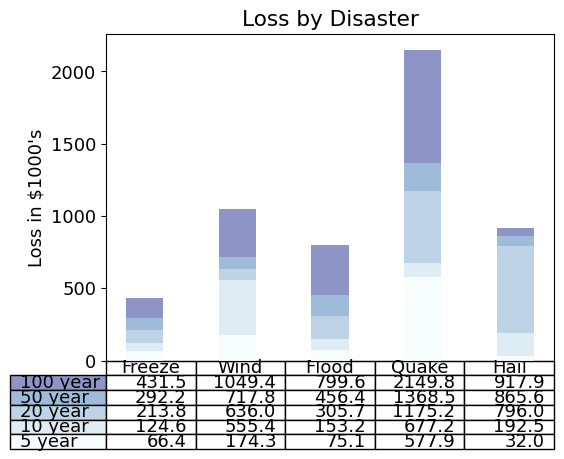

In [6]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text, rowLabels=rows, rowColours=colors, colLabels=columns, loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

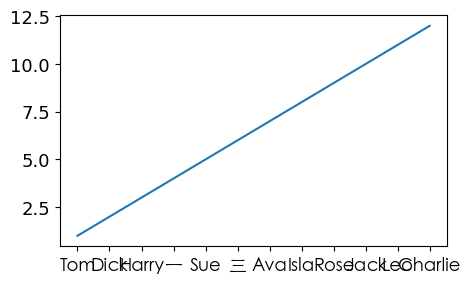

In [40]:
x = range(1,13,1)
y = range(1,13,1)
plt.figure(figsize=(5,3) )
plt.plot(x,y)
plt.xticks(x, ('Tom','Dick','Harry','一','Sue','三','Ava','Isla','Rose','Jack','Leo','Charlie'), fontproperties = zhfont)
plt.show()

<Figure size 640x480 with 0 Axes>

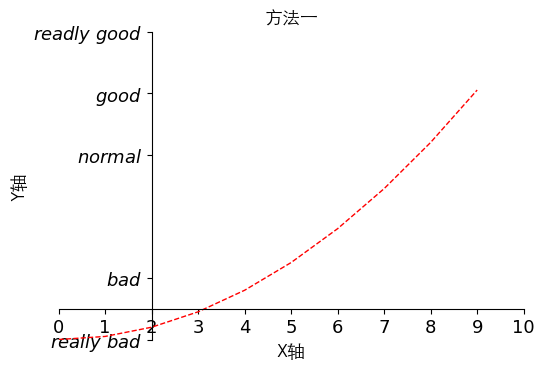

In [42]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
x = np.arange(0,10,1)   #这个函数的第三个参数表示的是步长, 以此进行划分
z = x**2
y = np.linspace(1,10,10)  #这个函数的第三个参数表示的是用几个点去划分, 作为y的值

plt.figure(figsize=(6, 4) )
plt.plot(x,z,color = 'red',linewidth=1.0,linestyle='--')
#线颜色   线宽   线样式

plt.title(u'方法一', fontproperties=zhfont)        #设置标题
plt.xlabel('X轴', fontproperties=zhfont)             #设置x, y轴的标签
plt.ylabel('Y轴', fontproperties=zhfont)
plt.xlim(0,10)              #设置x,y的区间
plt.ylim(0,100)
#plt.axis([0,10,0,100])这一句可以替换以上两句
plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
# 第一个参数是点的位置, 第二个参数是点的文字提示. 
plt.yticks([0, 20, 60, 80, 100],
          [r'$really\ bad$', r'$bad$', r'$normal$', r'$good$', r'$readly\ good$'])
          #$表示特殊的字体, 这边如果后期有需要可以上网查, 空格需要转译, 数学alpha可以用\来实现
ax = plt.gca()      #gca='get current axis'
# 将右边和上边的边框(脊)的颜色去掉
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax = plt.gca()
# 绑定x轴和y轴
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# # 定义x轴和y轴的位置
ax.spines['bottom'].set_position(('data', 10))
ax.spines['left'].set_position(('data', 2))

plt.show()

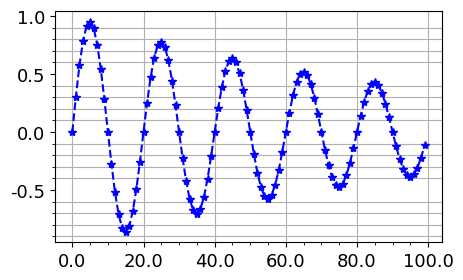

In [3]:
from pylab import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

xmajorLocator   = MultipleLocator(20) # 将x主刻度标签设置为20的倍数
xmajorFormatter = FormatStrFormatter('%1.1f') # 设置x轴标签文本的格式
xminorLocator   = MultipleLocator(5) # 将x轴次刻度标签设置为5的倍数

ymajorLocator   = MultipleLocator(0.5) # 将y轴主刻度标签设置为0.5的倍数
ymajorFormatter = FormatStrFormatter('%1.1f') # 设置y轴标签文本的格式
yminorLocator   = MultipleLocator(0.1) # 将此y轴次刻度标签设置为0.1的倍数

t = arange(0.0, 100.0, 1)
s = sin(0.1*pi*t)*exp(-t*0.01)

plt.figure(figsize=(5, 3) )

ax = subplot(111 ) #注意:一般都在ax中设置,不再plot中设置
plot(t,s,'--b*')

#设置主刻度标签的位置,标签文本的格式
ax.xaxis.set_major_locator(xmajorLocator)
ax.xaxis.set_major_formatter(xmajorFormatter)

ax.yaxis.set_major_locator(ymajorLocator)
ax.yaxis.set_major_formatter(ymajorFormatter)

#显示次刻度标签的位置,没有标签文本
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)

ax.xaxis.grid(True, which='major') #x坐标轴的网格使用主刻度
ax.yaxis.grid(True, which='minor') #y坐标轴的网格使用次刻度

show()

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


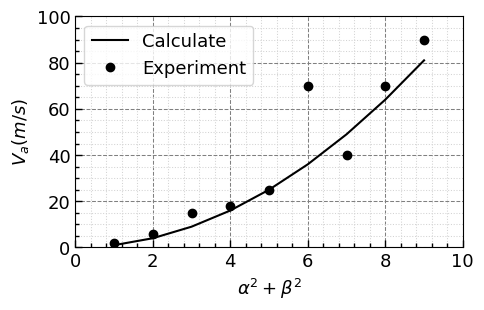

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

x = np.arange(1, 10)
y1 = x ** 2
y2 = np.array([2, 6, 15, 18, 25, 70, 40, 70, 90])
plt.figure(figsize=(5, 3))
plt.rcParams["figure.dpi"] = 300  # 分辨率
axes = plt.subplot()
axes.minorticks_on()
axes.tick_params(axis="both", which="major", direction="in", width=1, length=5)
axes.tick_params(axis="both", which="minor", direction="in", width=1, length=3)
axes.xaxis.set_minor_locator(MultipleLocator(0.4))

plt.plot(x, y1, color="k")
plt.plot(x, y2, marker="o", linestyle="none", color="k")
plt.axis([0, 10, 0, 100])
plt.grid(True, which="major", linestyle="--", color="gray", linewidth=0.75)
plt.grid(True, which="minor", linestyle=":", color="lightgray", linewidth=0.75)
plt.xlabel(r"$\alpha^2+\beta^2$")
plt.ylabel(r"$V_a (m/s)$")
plt.legend(["Calculate", "Experiment"])
plt.show()

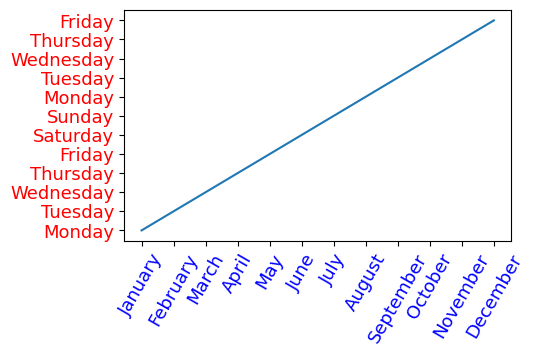

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import calendar
from datetime import *

x = range(1,13,1)
y = range(1,13,1)
plt.figure(figsize=(5,3) )
plt.plot(x,y)
plt.xticks(x, calendar.month_name[1:13],color='blue',rotation=60)
today = datetime(2018, 9, 10)
a=[]
for i in range(12):
    a.append(calendar.day_name[today.weekday()+(i%7)])
plt.yticks(y,a,color='red')
plt.show()

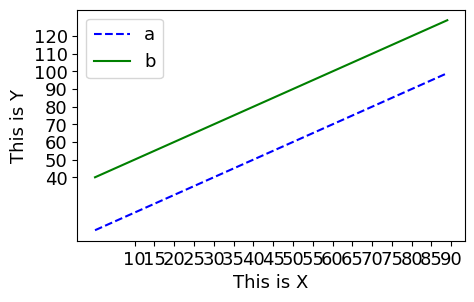

In [47]:
import matplotlib.pyplot as plt
import numpy as np

a = np.arange(10,100)
b = np.arange(40,130)

# 设置x/y轴尺度
plt.figure(figsize=(5, 3) )
plt.xticks(a[::5])
plt.yticks(b[::10])

# 传入xy轴参数, 默认为y轴;label 指定图例名称
plt.plot(a,label="a",linestyle="--",color="blue")
plt.plot(b,label="b",color="green")

plt.legend(loc="best")  # 设置图例位置 
# loc参数: best,upper right,upper left,lower left,lower right,right,center left,center right,lower center,upper center,center 

# 指定xy轴 名称
plt.ylabel("This is Y")
plt.xlabel("This is X")

# 保存图像 默认png格式, 其中dpi指图片质量
# plt.savefig("05.png", dpi=600)

plt.show()  # 展示图片

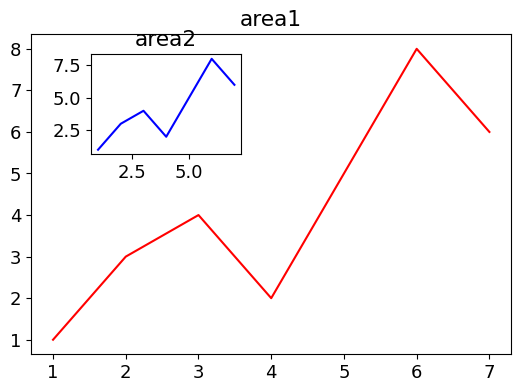

In [48]:
import numpy as np  
import matplotlib.pyplot as plt  

#新建figure
fig = plt.figure(figsize=(6, 4) )
# 定义数据
x = [1, 2, 3, 4, 5, 6, 7]
y = [1, 3, 4, 2, 5, 8, 6]
#新建区域ax1

#figure的百分比,从figure 10%的位置开始绘制, 宽高是figure的80%
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
# 获得绘制的句柄
ax1 = fig.add_axes([left, bottom, width, height])
ax1.plot(x, y, 'r')
ax1.set_title('area1')

#新增区域ax2,嵌套在ax1内
left, bottom, width, height = 0.2, 0.6, 0.25, 0.25
# 获得绘制的句柄
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(x,y, 'b')
ax2.set_title('area2')
plt.show() 

<AxesSubplot:xlabel='State', ylabel='count'>

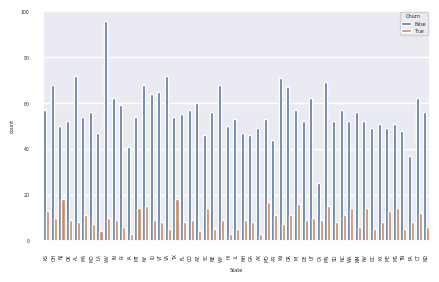

In [5]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

#读取示例数据
sns.set(font_scale=0.3)
# sns.set_context('notebook', rc={'font_scale': 0.5})
plt.figure(figsize=(5,3) )
plt.xticks(rotation=90)
df = pd.read_csv( 'https://labfile.oss.aliyuncs.com/courses/1283/telecom_churn.csv')
sns.countplot(x='State', hue='Churn', data=df)

#画分布图
# sns.countplot(x=df['State'], hue=df['Churn'])
# fig2.autofmt_xdate()

<AxesSubplot:xlabel='class', ylabel='survived'>

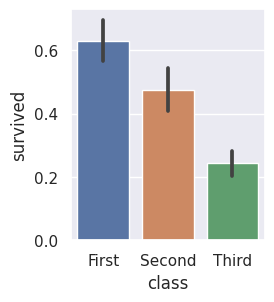

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
# https://github.com/mwaskom/seaborn-data
titanic=sns.load_dataset('titanic')
# print(f"{titanic.sample(10) }")

plt.figure(figsize=(2.5,3) )
sns.barplot(x='class',y='survived',data=titanic)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid") #这是seaborn默认的风格

In [11]:
# scatterplot(散点图)
#scatterplot参数
# seaborn.scatterplot(x=None, y=None, hue=None, style=None, size=None, 
# data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, 
# size_order=None, size_norm=None, markers=True, style_order=None,
#  x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, 
#  alpha='auto', x_jitter=None, y_jitter=None, legend='brief', ax=None, **kwargs)

# x, y: 容易理解就是你需要传入的数据, 一般为dataframe中的列; 
# hue: 也是具体的某一可以用做分类的列, 作用是分类; 
# data: 是你的数据集, 可要可不要, 一般都是dataframe; 
# style: 绘图的风格; 
# size: 绘图的大小; 
# palette: 调色板; 
# markers: 绘图的形状; 
# ci: 允许的误差范围(空值误差的百分比, 0-100之间), 可为'sd', 则采用标准差(默认95); 
# n_boot(int): 计算置信区间要使用的迭代次数; 
# alpha: 透明度; 
# x_jitter, y_jitter: 设置点的抖动程度. 

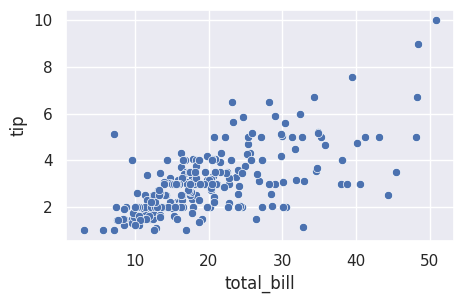

In [19]:
tips = sns.load_dataset("tips")  #https://github.com/mwaskom/seaborn-data
# sns.set_context({'figure.figsize':[6, 4]})
sns.set(rc={'figure.figsize':(5,3)})
ax = sns.scatterplot(x="total_bill", y="tip", data=tips)

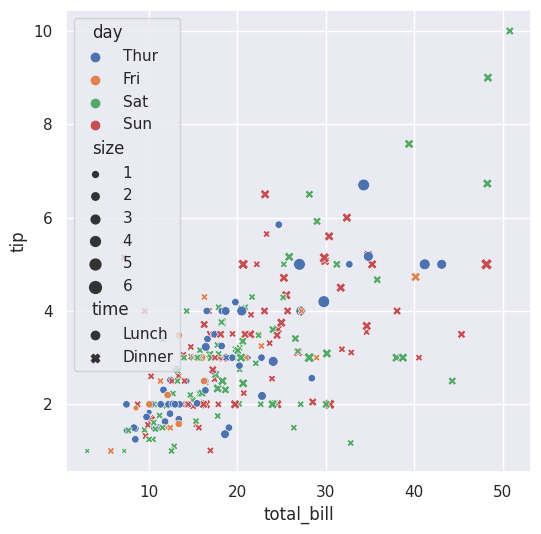

In [23]:
sns.set(rc={'figure.figsize':(6,6)})
ax = sns.scatterplot(x="total_bill", y="tip",hue="day", style="time",size='size',data=tips)

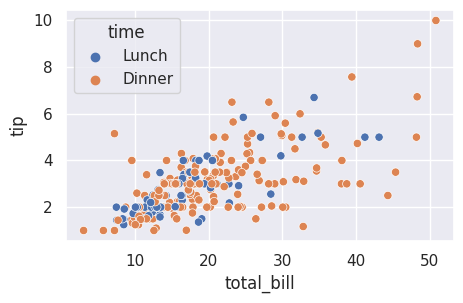

In [4]:
# 根据time分类的散点图
sns.set()
tips = sns.load_dataset("tips")
plt.figure(figsize=(5,3) )
sns.scatterplot(x="total_bill", y="tip", hue="time",data=tips)
plt.show()

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


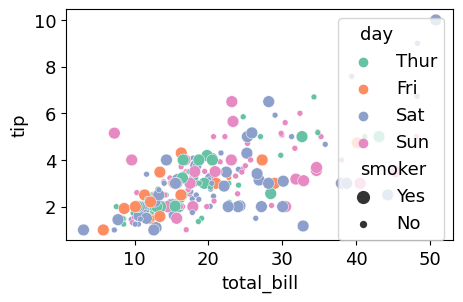

In [2]:
# 同时设置hue和size, 根据设置的类别, 产生颜色和大小不同的点的散点图 不过这里的颜色使用的是Set2中的, palette="Set2"
# sns.set()
tips = sns.load_dataset("tips")
plt.figure(figsize=(5,3) )
sns.scatterplot(x="total_bill", y="tip",hue="day", size="smoker", palette="Set2",data=tips)
plt.show()

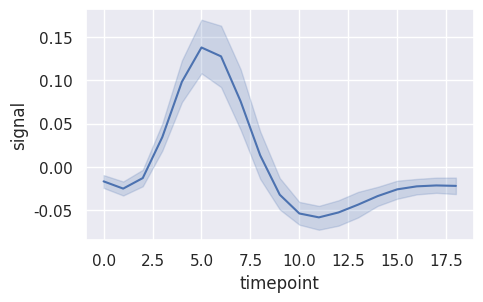

In [25]:
# lineplot(线图)
# seaborn.lineplot(x=None, y=None, hue=None, size=None, style=None,
#  data=None, palette=None, hue_order=None, hue_norm=None, sizes=None,
#   size_order=None, size_norm=None, dashes=True, markers=None, 
#   style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, 
#   sort=True, err_style='band', err_kws=None, legend='brief', ax=None, **kwargs)

# data:是DataFrame类型的;
# 可选:下面均为可选
# x,y:数据中变量的名称;
# hue:数据中变量名称(比如:二维数据中的列名)
# 作用:对将要生成不同颜色的线进行分组, 可以是分类或数据. 
# size:数据中变量名称(比如:二维数据中的列名)
# 作用:对将要生成不同宽度的线进行分组, 可以是分类或数据. 
# style:数据中变量名称(比如:二维数据中的列名)
# 作用:对将生成具有不同破折号, 或其他标记的变量进行分组. 
# palette:调试板名称, 列表或字典类型
# 作用:设置hue指定的变量的不同级别颜色. 
# hue_order:列表(list)类型
# 作用:指定hue变量出现的指定顺序, 否则他们是根据数据确定的. 
# hue_norm:tuple或Normalize对象
# sizes:list dict或tuple类型
# 作用:设置线宽度, 当其为数字时, 它也可以是一个元组, 指定要使用的最大和最小值, 会自动在该范围内对其他值进行规范化. 
# units:对变量识别抽样单位进行分组, 使用时, 将为每个单元绘制一个单独的行. 
# estimator:pandas方法的名称或回调函数或者None
# 作用:用于在同一x水平上聚合y变量的多个观察值的方法, 如果为None, 则将绘制所有观察结果. 


sns.set(rc={'figure.figsize':(5,3)})
fmri = sns.load_dataset("fmri")
ax = sns.lineplot(x="timepoint", y="signal", data=fmri)

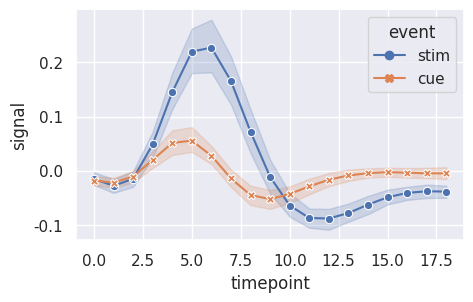

In [26]:
ax = sns.lineplot(x="timepoint", y="signal",hue="event", style="event",
markers=True, dashes=False, data=fmri)

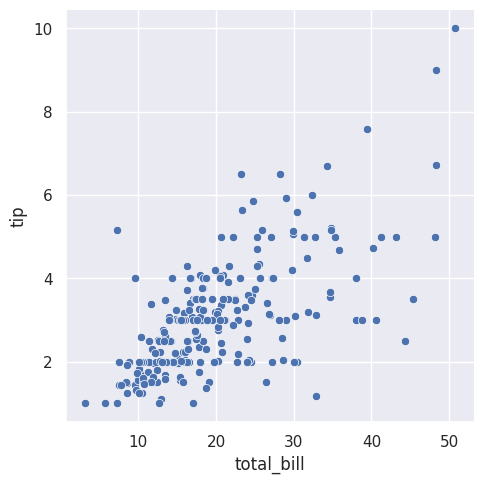

In [31]:
# relplot(关系图)
# seaborn.relplot(x=None, y=None, hue=None, size=None, style=None, 
# data=None, row=None, col=None, col_wrap=None, row_order=None, 
# col_order=None, palette=None, hue_order=None, hue_norm=None, 
# sizes=None, size_order=None, size_norm=None, markers=None, dashes=None,
#  style_order=None, legend='brief', kind='scatter', height=5, aspect=1,
#   facet_kws=None, **kwargs)

# 必须的参数x,y,data 其他参数均为可选;
# x,y:数据中变量的名称;
# data:是DataFrame类型的;
# 可选:下面均为可选
# hue:数据中的名称 对将生成具有不同颜色的元素的变量进行分组. 可以是分类或数字.
# row, col:数据中变量的名称 分类变量将决定网格的分面, 具体看实例; 
# col_wrap:int 这个变量设置可以将多列包装以多行的形式展现(有时太多列展现, 不便利), 但不可以将多行以多列的形式展现. 
# size:List, dict或tuple, 可选, 简单点就是图片大小, 注意和size区分;  数据中的名称 根据指定的名称(列名), 根据该列中的数据值的大小生成具有不同大小的效果. 可以是分类或数字. 
# kind: 默认scatter(散点图), 也可以选择kind='line'(线图); 


sns.set(rc={'figure.figsize':(5,4)})
tips = sns.load_dataset("tips")
g = sns.relplot(x="total_bill", y="tip", data=tips)
# ax = sns.scatterplot(x="total_bill", y="tip", data=tips) # 两者效果一模一样


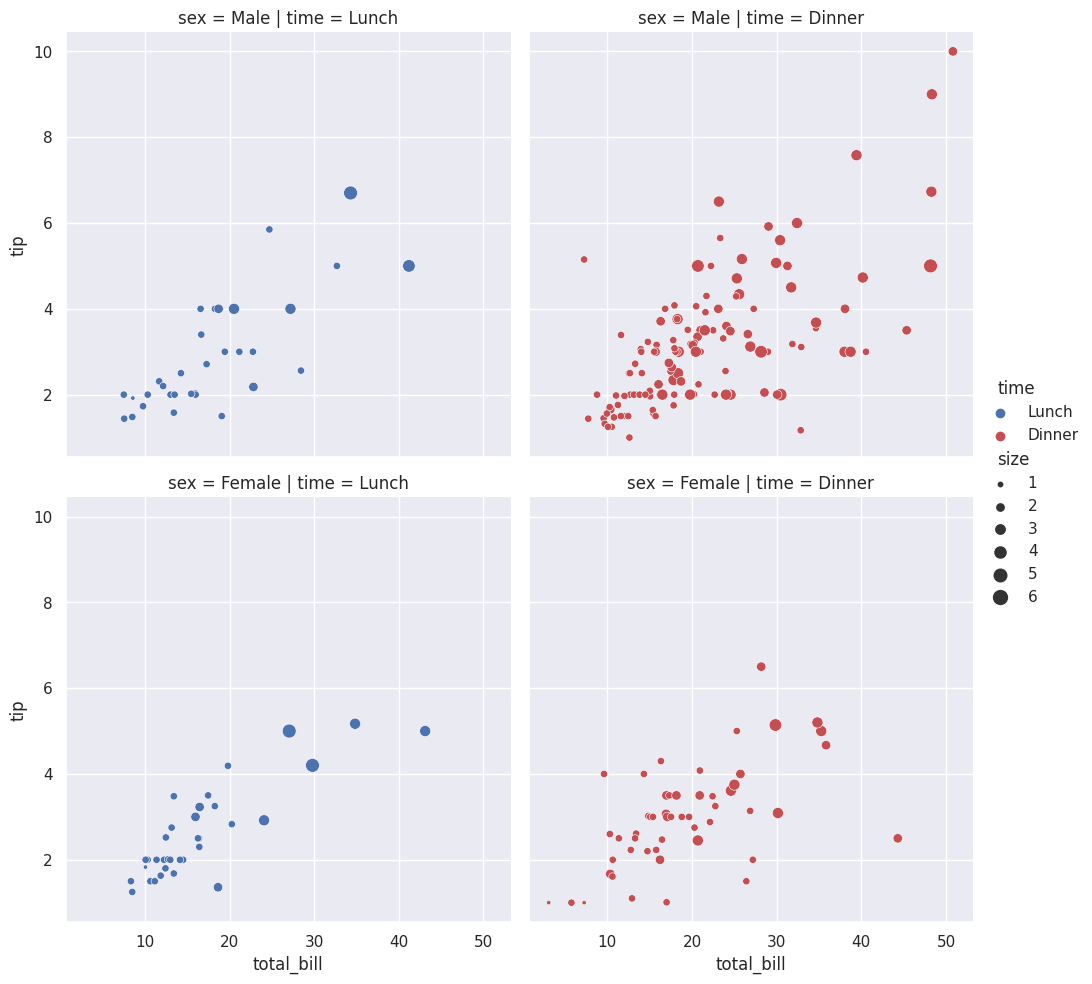

In [36]:
# sns.set(rc={'figure.figsize':(3,3)})
# sns.set_context({'figure.figsize':[6, 4]})
g = sns.relplot(x="total_bill", y="tip", hue="time", size="size",
palette=["b", "r"], sizes=(10, 100),col="time",row='sex', data=tips)

In [ ]:
# Categorical plots(分类图)
# Categorical plots(分类图)可以具体分为下面三种类型, 8个小图: 

# Categorical scatterplots(分类散点图)
# stripplot(分布散点图)
# swarmplot(分布密度散点图)
# Categorical distribution plots(分类分布图)
# boxplot(箱线图)
# violinplot(小提琴图)
# boxenplot(字母价值图)
# Categorical estimate plots(分类估计图)
# pointplot(点图)
# barplot(条形图)
# countplot(计数统计图)

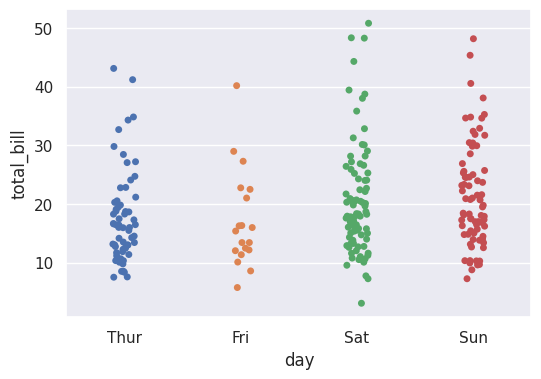

In [37]:
# Categorical scatterplots(分类散点图)
# stripplot(分布散点图)

# seaborn.stripplot(x=None, y=None, hue=None, data=None, order=None, 
# hue_order=None, jitter=True, dodge=False, orient=None, color=None, 
# palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)

# x, y, data: 输入数据可以多种格式传递, 在大多数情况下, 使用Numpy或Python对象是可能的, 但是更可取的是pandas对象, 因为相关的名称将用于对轴进行注释. 此外, 还可以对分组变量使用分类类型来控制情节元素的顺序. 
# order: 用order参数进行筛选分类类别, 例如: order=['sun','sat']; 
# jitter: 抖动项, 表示抖动程度, 可以使float, 或者True; 
# dodge: 重叠区域是否分开, 当使用hue时, 将其设置为True, 将沿着分类轴将不同色调级别的条带分开. 
# orient: 'v' | 'h', vertical(垂直) 和 horizontal(水平)的意思; 

tips = sns.load_dataset("tips")
ax = sns.stripplot(x="day", y="total_bill", data=tips)


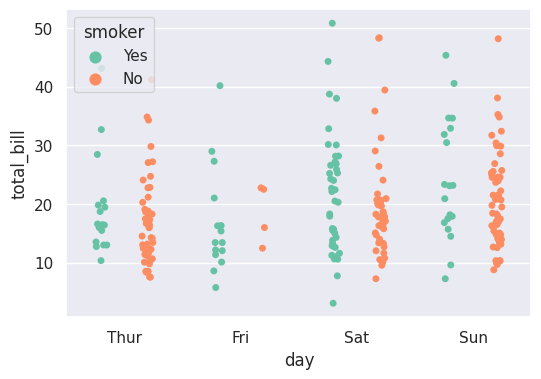

In [39]:
tips = sns.load_dataset("tips")
ax = sns.stripplot(x="day", y="total_bill", hue="smoker",data=tips, jitter=True,palette="Set2", dodge=True)

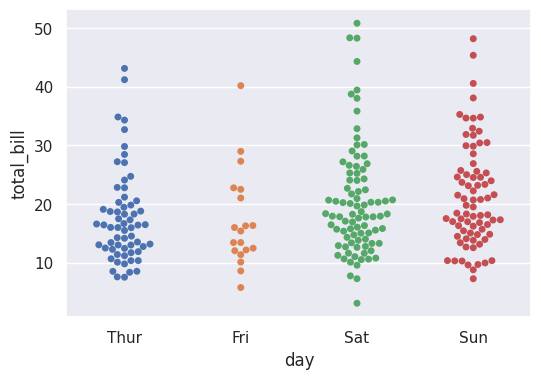

In [40]:
# swarmplot(分布密度散点图)

# seaborn.swarmplot(x=None, y=None, hue=None, data=None, order=None,
#  hue_order=None, dodge=False, orient=None, color=None, palette=None, size=5, 
#  edgecolor='gray', linewidth=0, ax=None, **kwargs)

tips = sns.load_dataset("tips")
ax = sns.swarmplot(x="day", y="total_bill", data=tips)

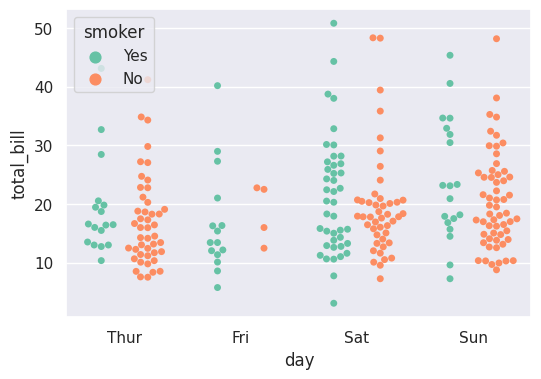

In [41]:
tips = sns.load_dataset("tips")
ax = sns.swarmplot(x="day", y="total_bill", hue="smoker",data=tips,palette="Set2", dodge=True)

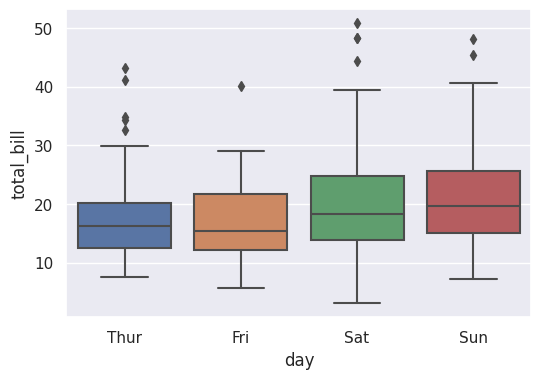

In [42]:
# Categorical distribution plots(分类分布图)
# boxplot(箱线图)

# seaborn.boxplot(x=None, y=None, hue=None, data=None, order=None, 
# hue_order=None, orient=None, color=None, palette=None, saturation=0.75, 
# width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)

# saturation: 饱和度, 可设置为1; 
# width: float, 控制箱型图的宽度大小; 
# fliersize: float, 用于指示离群值观察的标记大小; 
# whis: 可理解为异常值的上限IQR比例; 
# notch: 我也不知道……

tips = sns.load_dataset("tips")
ax = sns.boxplot(x="day", y="total_bill", data=tips)
ax.figure.set_size_inches(7,4)

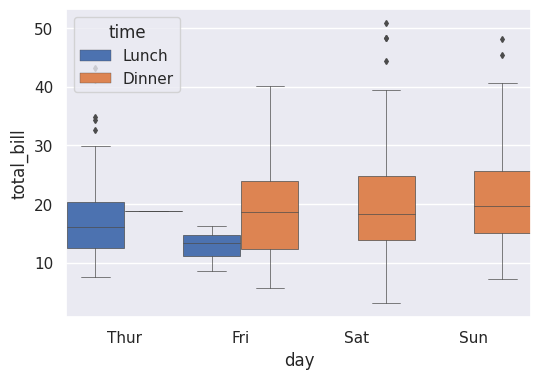

In [43]:
tips = sns.load_dataset("tips")
ax = sns.boxplot(x="day", y="total_bill", hue="time",data=tips, linewidth=0.5,saturation=1,width=1,fliersize=3)

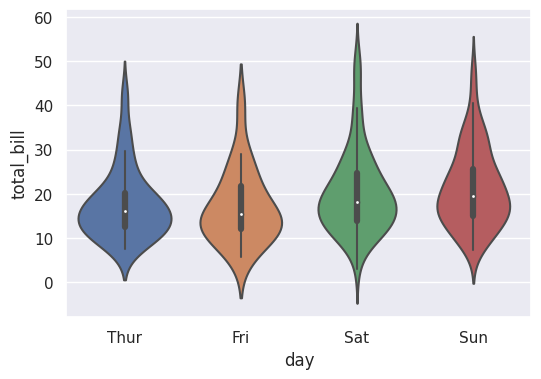

In [44]:
# violinplot(小提琴图)

# seaborn.violinplot(x=None, y=None, hue=None, data=None, order=None, 
# hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, 
# width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, 
# color=None, palette=None, saturation=0.75, ax=None, **kwargs)

# bw: 'scott', 'silverman', float, 控制拟合程度. 在计算内核带宽时, 可以引用规则的名称('scott', 'silverman')或者使用比例(float). 实际内核大小将通过将比例乘以每个bin内数据的标准差来确定; 
# cut: 空值外壳的延伸超过极值点的密度, float; 
# scale: 'area', 'count', 'width', 用来缩放每把小提琴的宽度的方法; 
# scale_hue: 当使用hue分类后, 设置为True时, 此参数确定是否在主分组变量进行缩放; 
# gridsize: 设置小提琴图的平滑度, 越高越平滑; 
# inner: 'box', 'quartile', 'point', 'stick', None,小提琴内部数据点的表示. 分别表示: 箱子, 四分位, 点, 数据线和不表示; 
# split: 是否拆分, 当设置为True时, 绘制经hue分类的每个级别画出一半的小提琴; 

tips = sns.load_dataset("tips")
ax = sns.violinplot(x="day", y="total_bill", data=tips)


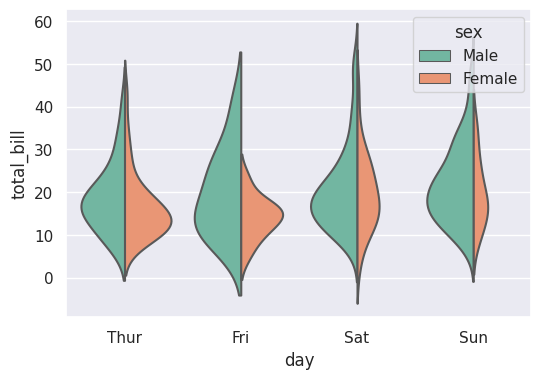

In [45]:
tips = sns.load_dataset("tips")
ax = sns.violinplot(x="day", y="total_bill", hue="sex",data=tips, palette="Set2", split=True,scale="count", inner=None)

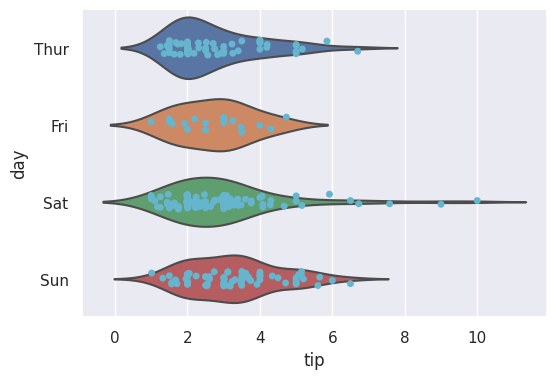

In [46]:
# violinplot+stripplot(小提琴图+分布散点图)
tips = sns.load_dataset("tips")
ax = sns.violinplot(x="tip", y="day", data=tips, inner=None,whis=np.inf)
ax = sns.stripplot(x="tip", y="day", data=tips,jitter=True, color="c")

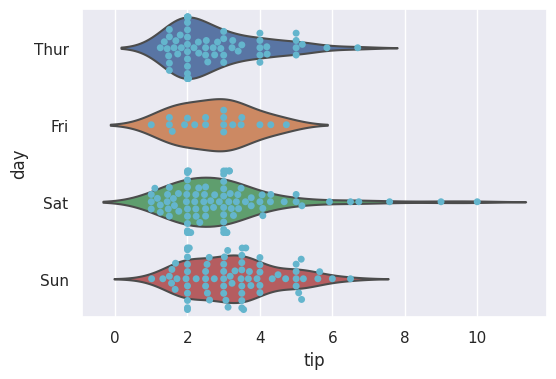

In [47]:
# violinplot+swarmplot(小提琴图+分布密度散点图)

tips = sns.load_dataset("tips")
ax = sns.violinplot(x="tip", y="day", data=tips,inner=None, whis=np.inf)
ax = sns.swarmplot(x="tip", y="day", data=tips, color="c")


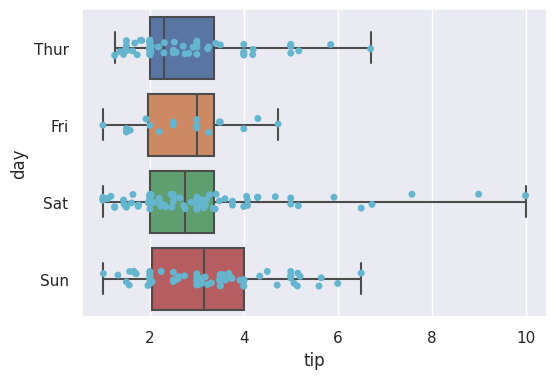

In [48]:
# boxplot+stripplot(箱线图+分布散点图)
tips = sns.load_dataset("tips")
ax = sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
ax = sns.stripplot(x="tip", y="day", data=tips,jitter=True, color="c")

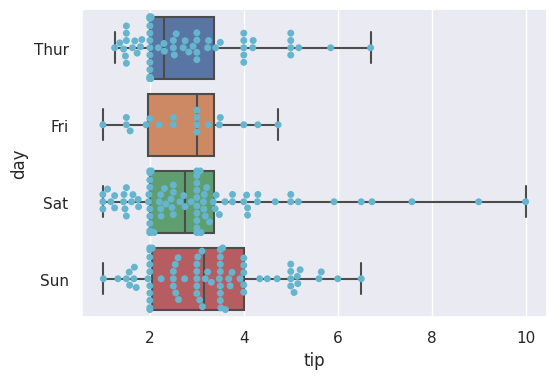

In [49]:
# boxplot+swarmplot(箱线图+分布密度散点图)
tips = sns.load_dataset("tips")
ax = sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
ax = sns.swarmplot(x="tip", y="day", data=tips, color="c")

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


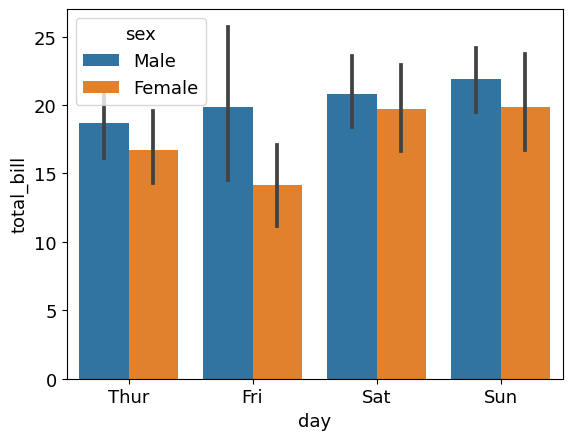

In [3]:
# Categorical estimate plots(分类估计图)

# seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, 
# estimator=<function mean>, ci=95, n_boot=1000, units=None, orient=None, 
# color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None,
# capsize=None, dodge=True, ax=None, **kwargs)

# estimator: 用于估计每个分类箱内的统计函数, 默认为mean. 当然你也可以设置estimator=np.median/np.std/np.var……
# order: 选择和空值顺序, 例如: order=['Sat','Sun']; 
# ci: 允许的误差的范围(控制误差棒的百分比, 在0-100之间),若填写"sd",则用标准误差(默认为95), 也可设置ci=None; 
# capsize: 设置误差棒帽条(上下两根横线)的宽度, float; 
# saturation: 饱和度; 
# errcolor: 表示置信区间的线条的颜色; 
# errwidth: float, 设置误差条线(和帽)的厚度. 

tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

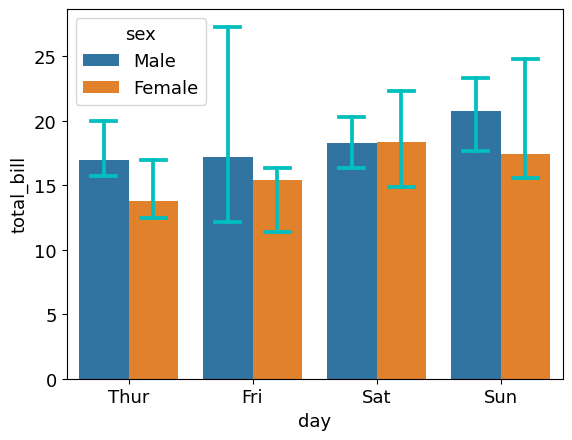

In [4]:
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill",hue='sex', data=tips, estimator=np.median,capsize=0.2,errcolor='c')

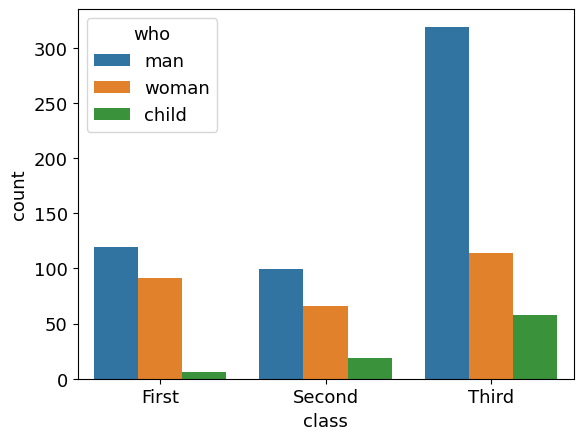

In [5]:
# countplot(计数图)

# seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, 
# hue_order=None, orient=None, color=None, palette=None, saturation=0.75, 
# dodge=True, ax=None, **kwargs)

titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="class", hue="who", data=titanic)

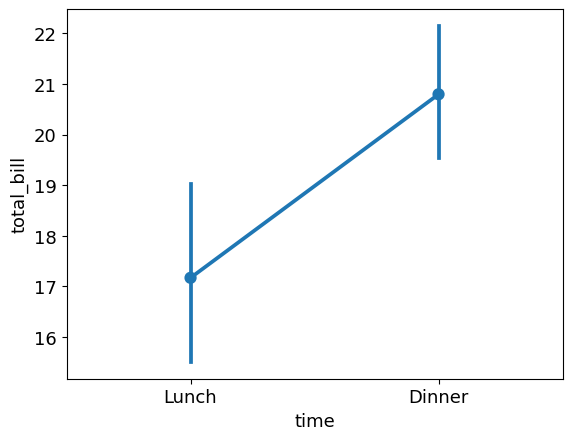

In [6]:
# piontplot(点图)

# seaborn.pointplot(x=None, y=None, hue=None, data=None, order=None, 
# hue_order=None, estimator=<function mean>, ci=95, n_boot=1000, 
# units=None, markers='o', linestyles='-', dodge=False, join=True, 
# scale=1, orient=None, color=None, palette=None, errwidth=None, 
# capsize=None, ax=None, **kwargs)

# join: 默认两个均值点会相连接, 若不想显示, 可以通过join=False参数实现; 
# scale: float, 均值点(默认)和连线的大小和粗细. 

tips = sns.load_dataset("tips")
ax = sns.pointplot(x="time", y="total_bill", data=tips)

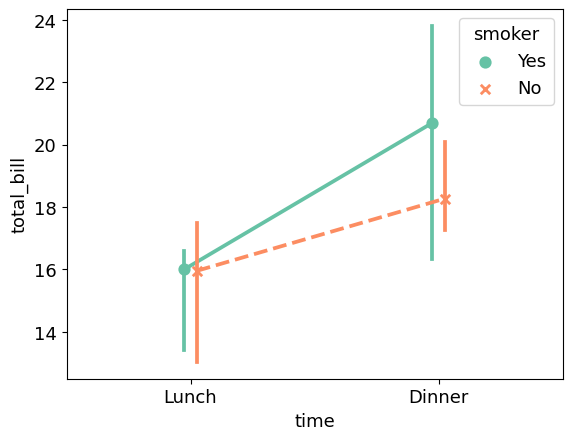

In [7]:
tips = sns.load_dataset("tips")
ax = sns.pointplot(x="time", y="total_bill", hue="smoker",data=tips,estimator=np.median, dodge=True, palette="Set2",markers=["o", "x"],linestyles=["-", "--"])

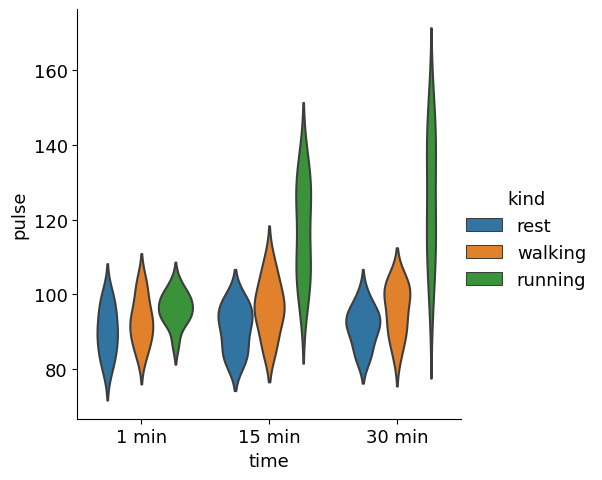

In [8]:
# catplot()

# seaborn.catplot(x=None, y=None, hue=None, data=None, row=None, col=None, 
# col_wrap=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, 
# order=None, hue_order=None, row_order=None, col_order=None, kind='strip',
#  height=5, aspect=1, orient=None, color=None, palette=None, legend=True, 
#  legend_out=True, sharex=True, sharey=True, margin_titles=False, 
#  facet_kws=None, **kwargs)

# kind: 默认strip(分布散点图), 也可以选择'point', 'bar', 'count',
# col, row: 将决定网格的面数的分类变量, 可具体制定; 
# col_wrap: 指定每行展示的子图个数, 但是与row不兼容; 
# row_order, col_order : 字符串列表, 安排行和列, 以及推断数据中的对象; 
# height, aspect: 与图像的大小有关; 
# sharex, sharey: bool, 'col'or 'row', 是否共享想, x, y坐标; 

exercise = sns.load_dataset("exercise")
g = sns.catplot(x="time", y="pulse", hue="kind",data=exercise, kind="violin",inner=None)

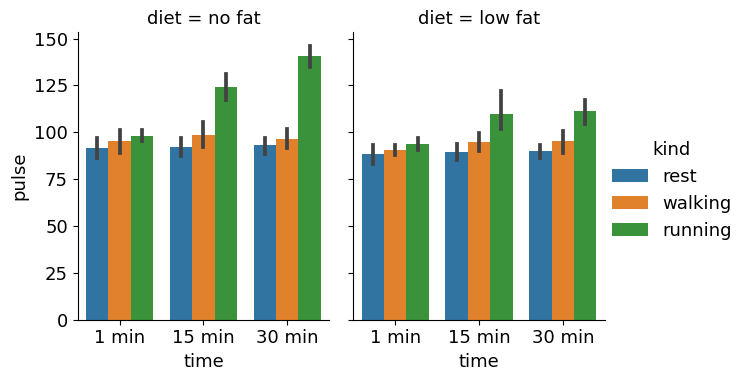

In [9]:
exercise = sns.load_dataset("exercise")
g = sns.catplot(x="time", y="pulse", hue="kind",kind='bar',col="diet", data=exercise,height=4, aspect=0.8)

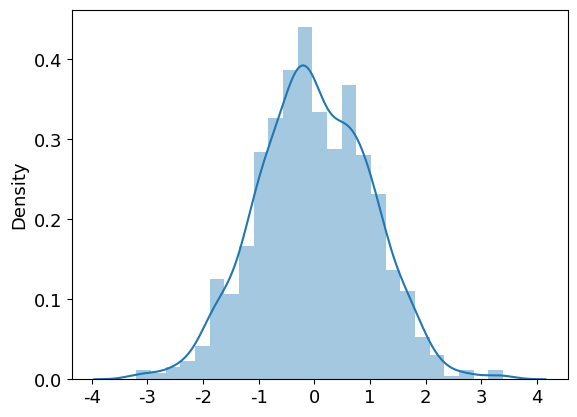

In [10]:
# Distribution plots(分布图)
# distplot(直方图)

# seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, 
# hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None,
#  vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)

# bins: int或list, 控制直方图的划分, 设置矩形图(就是块儿的多少)数量, 除特殊要求一般默认; 
# hist: 是否显示方块; 
# kde: 是否显示核密度估计曲线; 
# rug: 控制是否生成观测数值的小细条(边际毛毯); 
# fit: 控制拟合的参数分布图形, 能够直观地评估它与观察数据的对应关系(黑色线条为确定的分布); 
# -{hist, kde, rug, fit}_kws : 参数接收字典类型, 可以自行定义更多高级的样式; 
# norm_hist: 若为True, 则直方图高度显示密度而非计数(含有kde图像中默认为True); 
# vertical: 放置的方向, 如果为真, 则观测值位于y-轴上(默认False, x轴上); 
# axlabel : string, False, or None, 设置标签. 

np.random.seed(666)
x = np.random.randn(1000)
ax = sns.distplot(x)

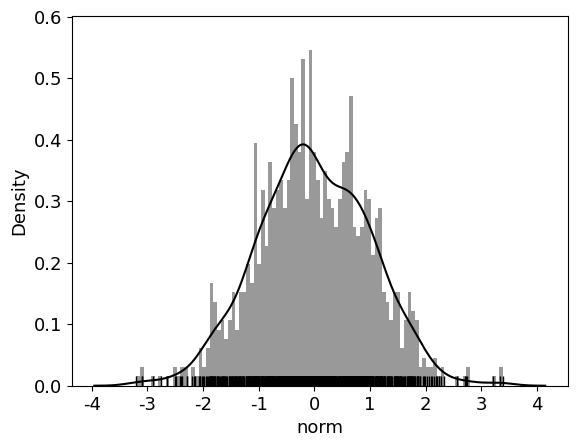

In [11]:
np.random.seed(666)
x = np.random.randn(1000)
ax = sns.distplot(x, bins=100,hist=True, kde=True, rug=True,color='k',axlabel='norm')

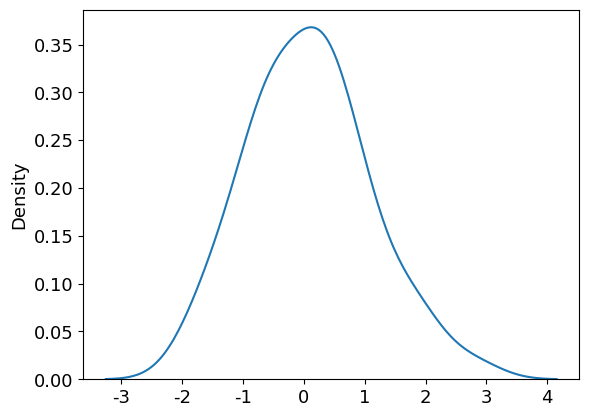

In [12]:
#  kdeplot(核密度图)

# seaborn.kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', 
# bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, 
# shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)

# data, data2: 表示可以输入双变量, 绘制双变量核密度图; 
# shade: 是否填充阴影, 默认不填充; 
# vertical: 放置的方向, 如果为真, 则观测值位于y轴上(默认False, x轴上); 
# kernel: {'gau' | 'cos' | 'biw' | 'epa' | 'tri' | 'triw' }. 默认高斯核('gau')二元KDE只能使用高斯核. 至于什么是核函数, 这个学问就大了, 建议多看看论文; 
# bw: {'scott' | 'silverman' | scalar | pair of scalars }. 四类核密度带方法, 默认scott (斯考特带宽法), 建议下来了解一下这四种方法的区别; 
# gridsize: 这个参数指的是每个格网里面, 应该包含多少个点, 越大, 表示格网里面的点越多(觉得电脑OK的可以试试, 有惊喜), 越小表示格网里面的点越少; 
# cut: 参数表示, 绘制的时候, 切除带宽往数轴极限数值的多少, 这个参数可以配合bw参数使用; 
# cumulative: 是否绘制累积分布; 
# shade_lowest: 是否有最低值渲染, 这个参数只有在二维密度图上才有效; 
# clip: 表示查看部分结果, 是一个区间; 
# cbar: 参数若为True, 则会添加一个颜色棒(颜色帮在二元kde图像中才有); 

mean, cov = [0, 2], [(1, .5), (.5, 1)]
#这是一个多元正态分布
x, y = np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(x)

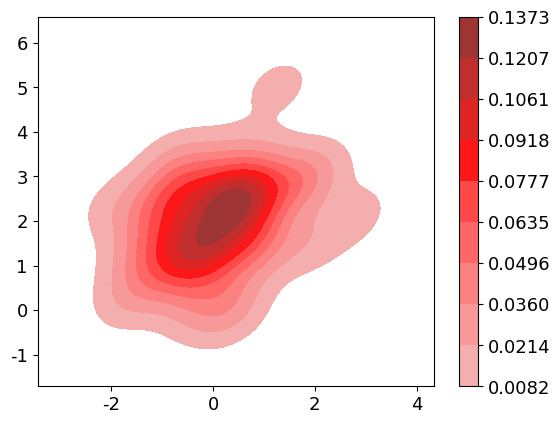

In [13]:
ax=sns.kdeplot(x,y,shade=True,shade_lowest=False,cbar=True,color='r')

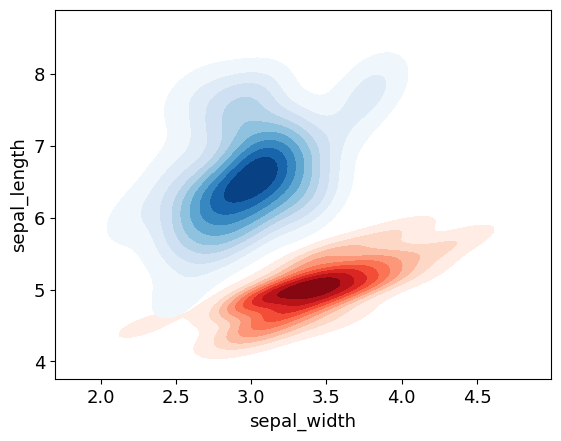

In [14]:
iris = sns.load_dataset("iris")
setosa = iris.loc[iris.species == "setosa"]
virginica = iris.loc[iris.species == "virginica"]
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,cmap="Reds",
 shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,cmap="Blues", 
shade=True, shade_lowest=False)

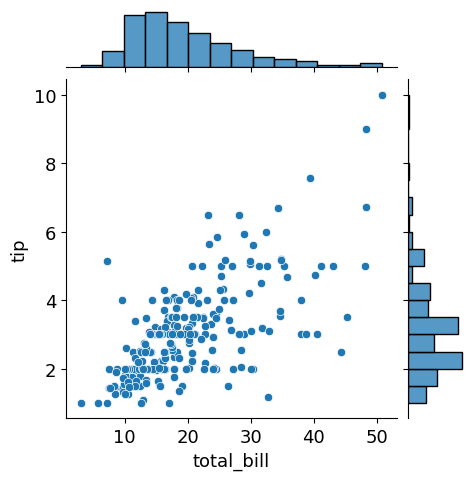

In [15]:
#  jointplot(联合分布图)

# seaborn.jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, 
# height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None,
#  marginal_kws=None, annot_kws=None, **kwargs)

# x,y: 为DataFrame中的列名或者是两组数据, data指向dataframe; 
# kind : { 'scatter' | 'reg' | 'resid' | 'kde' | 'hex' }. 默认散点图; 
# stat_func: 用于计算统计量关系的函数; 
# ratio: 中心图与侧边图的比例, 越大, 中心图占比越大; 
# dropna: 去除缺失值; 
# height: 图的尺度大小(正方形); 
# space: 中心图与侧边图的间隔大小; 
# xlim, ylim: x, y的范围

tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips,height=5)

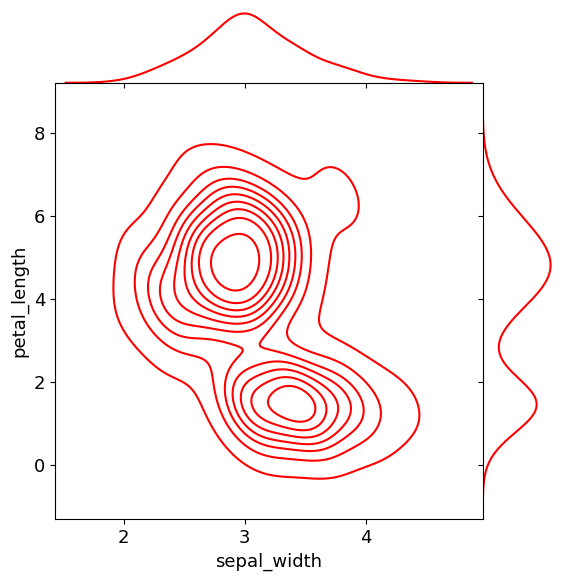

In [16]:
iris = sns.load_dataset("iris")
g = sns.jointplot("sepal_width", "petal_length", data=iris,kind="kde", space=0,ratio=6 ,color="r")


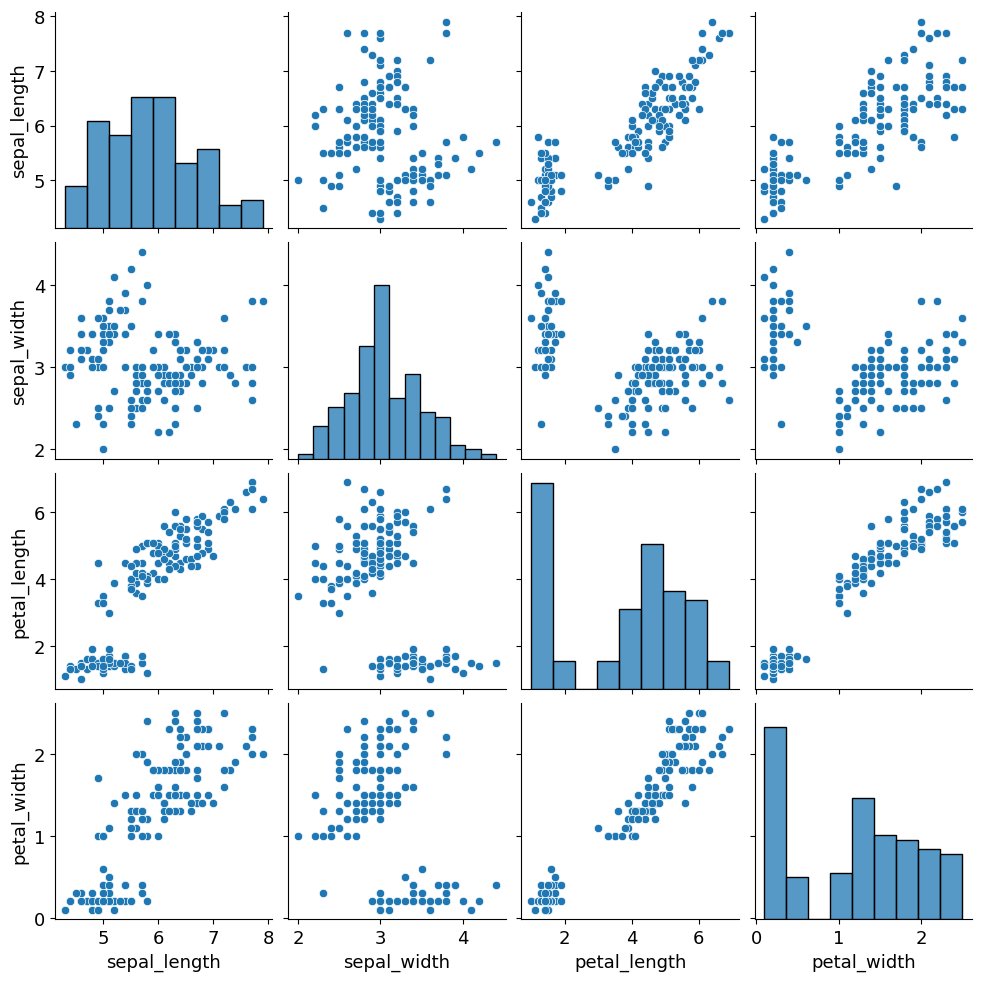

In [17]:
# pairplot(变量关系组图)

# seaborn.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, 
# x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None,
#  height=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, 
#  grid_kws=None, size=None)

# var: data中的子集, 否则使用data中的每一列; 
# x_vars / y_vars: 可以具体细分, 谁与谁比较; 
# kind: {'scatter', 'reg'}; 
# diag_kind: {'auto', 'hist', 'kde'}. 单变量图(自己与自己比较)的绘图, 对角线子图的图样. 默认情况取决于是否使用'hue'. 

iris = sns.load_dataset("iris")
g = sns.pairplot(iris)


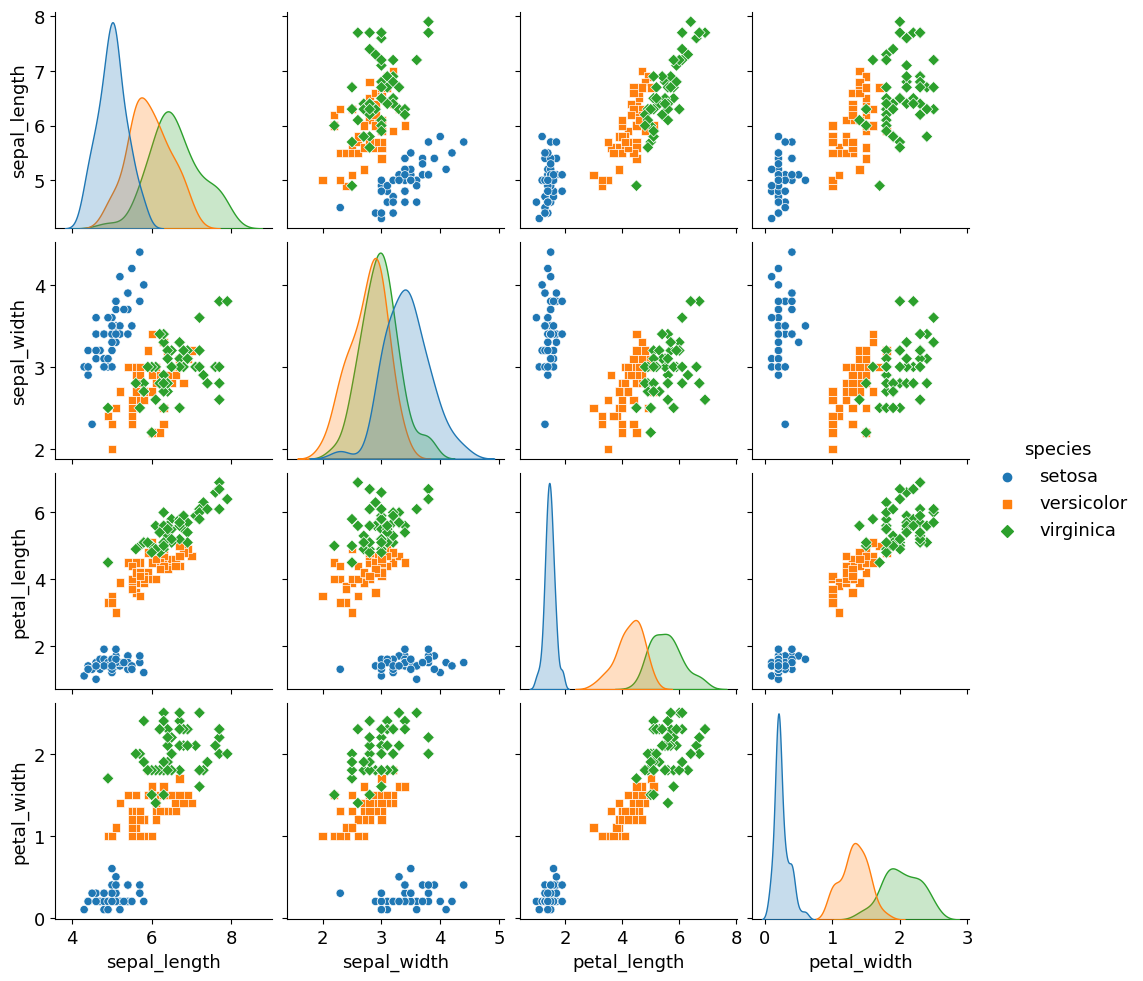

In [18]:
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

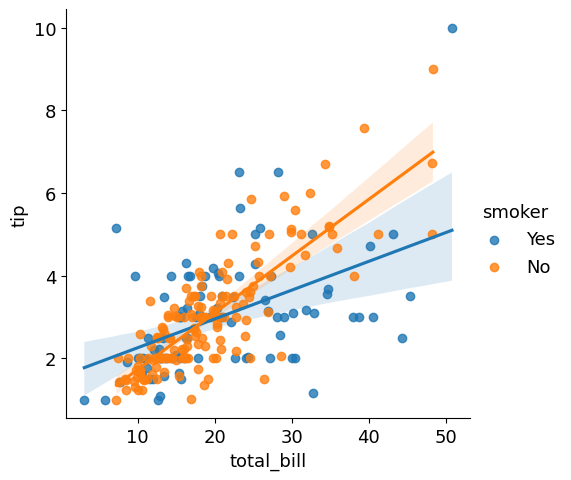

In [19]:
# Regression plots(回归图)
# lmplot(回归图)

# seaborn.lmplot(x, y, data, hue=None, col=None, row=None, palette=None, 
# col_wrap=None, height=5, aspect=1, markers='o', sharex=True, sharey=True, 
# hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, 
# x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, 
# n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, 
# logx=False, x_partial=None, y_partial=None, truncate=False, x_jitter=None, 
# y_jitter=None, scatter_kws=None, line_kws=None, size=None)

# col, row: 和前面一样, 根据所指定属性在列, 行上分类; 
# col_wrap: 指定每行的列数, 最多等于col参数所对应的不同类别的数量; 
# aspect: 控制图的长宽比; 
# x_jitter, y_jitter: 给x, y轴随机增加噪音点, 设置这两个参数不影响最后的回归直线; 
# order: 多项式回归, 控制进行回归的幂次, 设定指数, 可以用多项式拟合; 
# logistic: 逻辑回归; 
# robust: 如果是True, 使用statsmodels来估计一个稳健的回归(鲁棒线性模型). 这将减少异常值. 请注意 logistic回归和robust回归相较于简单线性回归需要更大的计算量, 其置信区间的产生也依赖于bootstrap采样, 你可以关掉置信区间估计来提高速度(ci=None); 
# lowess: 如果是True, 使用statsmodels来估计一个非参数的模型(局部加权线性回归). 这种方法具有最少的假设, 尽管它是计算密集型的, 但目前无法为这类模型绘制置信区间; 
# logx: 转化为log(x)
# truncate: 默认情况下, 绘制散点图后绘制回归线以填充x轴限制. 如果为True, 则它将被数据限制所限制; 
# 绘制一个第三个变量的条件, 并绘制不同颜色的回归图: 

tips = sns.load_dataset("tips")
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

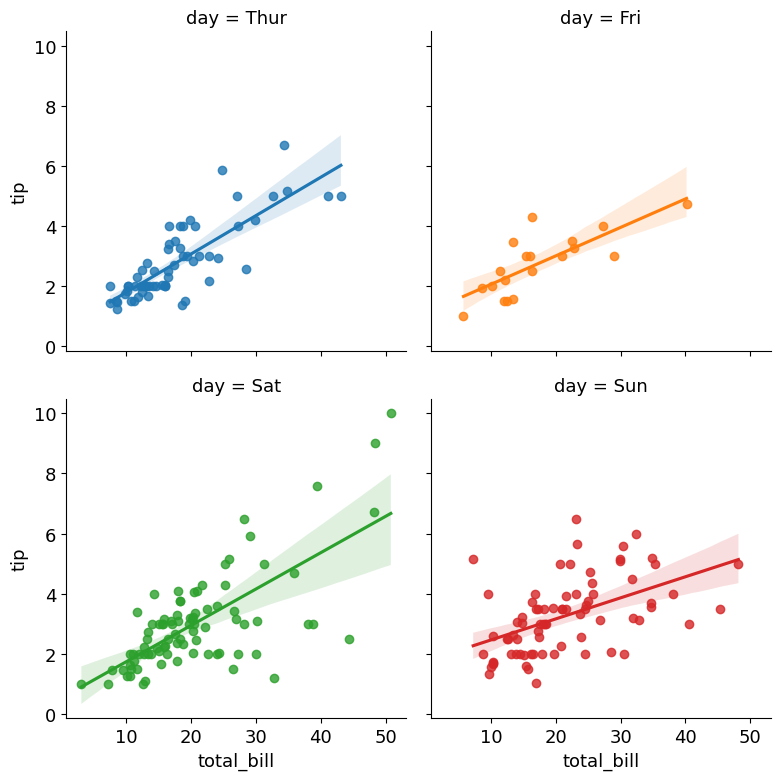

In [20]:
tips = sns.load_dataset("tips")
g = sns.lmplot(x="total_bill", y="tip", col="day", hue="day",data=tips, col_wrap=2, height=4)

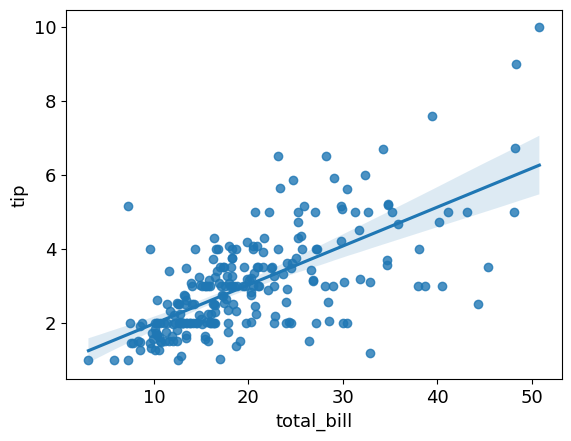

In [21]:
# regplot()

# seaborn.regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', 
# scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, 
# lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
# truncate=False, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, 
# marker='o', scatter_kws=None, line_kws=None, ax=None)

tips = sns.load_dataset("tips")
g = sns.regplot(x="total_bill", y="tip",data=tips)


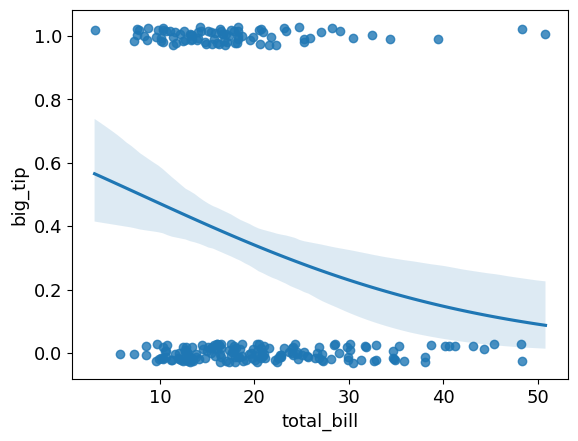

In [22]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .175
ax = sns.regplot(x="total_bill", y="big_tip", data=tips,logistic=True, n_boot=500, y_jitter=.03)

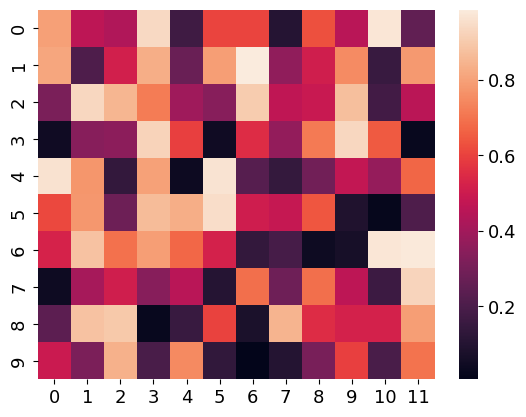

In [23]:
# Matrix plots(矩阵图)
# heatmap(热力图)

# seaborn.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, 
# robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', 
# cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', 
# yticklabels='auto', mask=None, ax=None, **kwargs)

# data: 矩阵数据集, 可以使numpy的数组(array), 如果是pandas的dataframe, 则df的index/column信息会分别对应到heatmap的columns和rows; 
# vmax,vmin: 图例中最大值和最小值的显示值, 没有该参数时默认不显示; 
# cmap: 从数字到色彩空间的映射, 取值是matplotlib包里的colormap名称或颜色对象, 或者表示颜色的列表; 
# center: 数据表取值有差异时, 设置热力图的色彩中心对齐值. 通过设置center值, 可以调整生成的图像颜色的整体深浅; 设置center数据时, 如果有数据溢出, 则手动设置的vmax, vmin会自动改变 ; 
# robust: 默认取值False; 如果是False, 且没设定vmin和vmax的值, 热力图的颜色映射范围根据具有鲁棒性的分位数设定, 而不是用极值设定; 
# annot(annotate的缩写): 默认取值False; 如果是True, 在热力图每个方格写入数据; 如果是矩阵, 在热力图每个方格写入该矩阵对应位置数据; 
# fmt: 字符串格式代码, 矩阵上标识数字的数据格式, 比如保留小数点后几位数字; 
# annot_kws:默认取值False; 如果是True, 设置热力图矩阵上数字的大小颜色字体; 
# square:设置热力图矩阵小块形状, 默认值是False; 
# xticklabels, yticklabels:控制每行列标签名的输出. 默认值是auto, 自动选择标签的标注间距, 将标签名不重叠的部分(或全部)输出. 如果是True, 则以DataFrame的列名作为标签名; 
# mask:控制某个矩阵块是否显示出来. 默认值是None. 如果是布尔型的DataFrame, 则将DataFrame里True的位置用白色覆盖掉. 

x = np.random.rand(10, 12)
ax = sns.heatmap(x)


findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


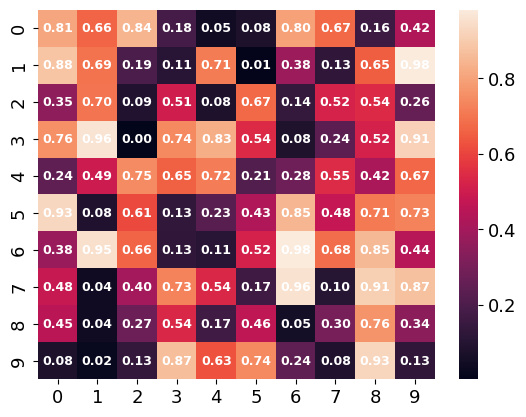

In [24]:
x= np.random.rand(10, 10)
ax = sns.heatmap(x,annot=True,annot_kws={'size':9,'weight':'bold', 'color':'w'},fmt='.2f')

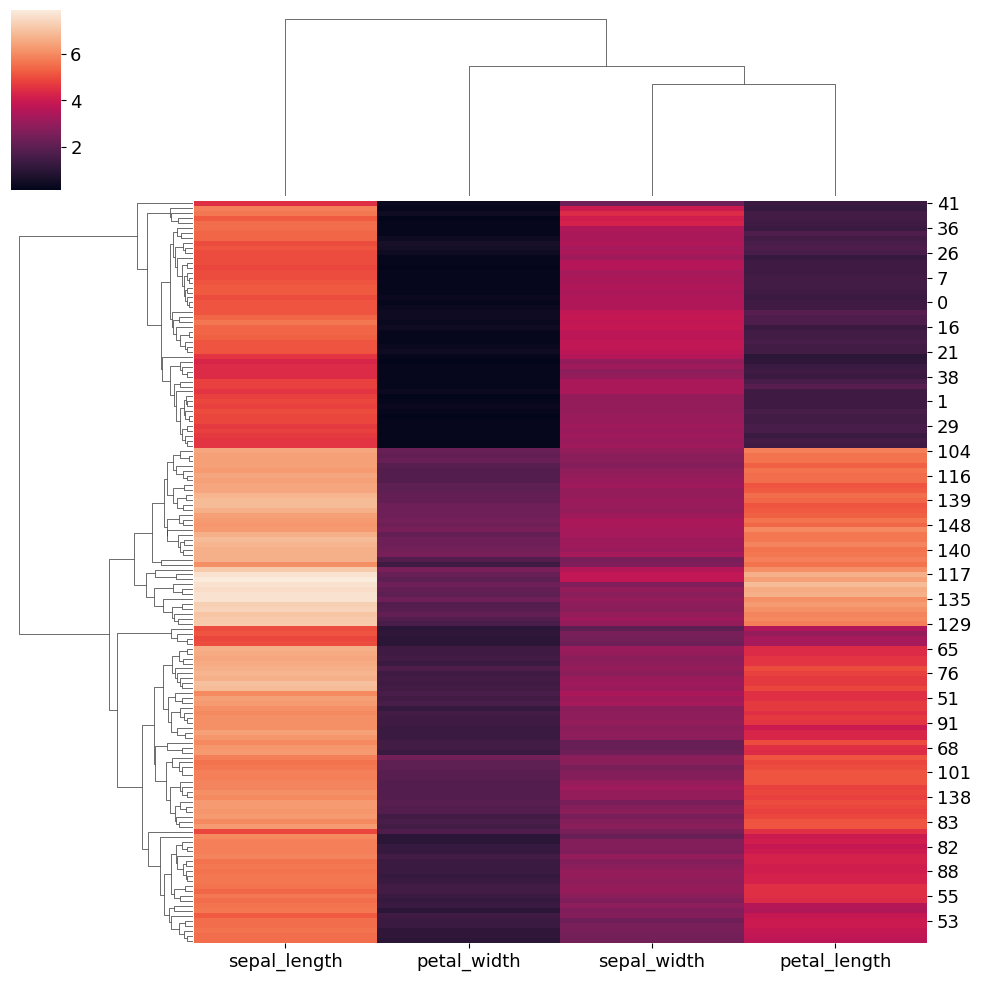

In [25]:
# clustermap(聚类图)

# seaborn.clustermap(data, pivot_kws=None, method='average', metric='euclidean', 
# z_score=None, standard_scale=None, figsize=None, cbar_kws=None, row_cluster=True, 
# col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, 
# mask=None, **kwargs)

iris = sns.load_dataset("iris")
species = iris.pop("species")
g = sns.clustermap(iris)


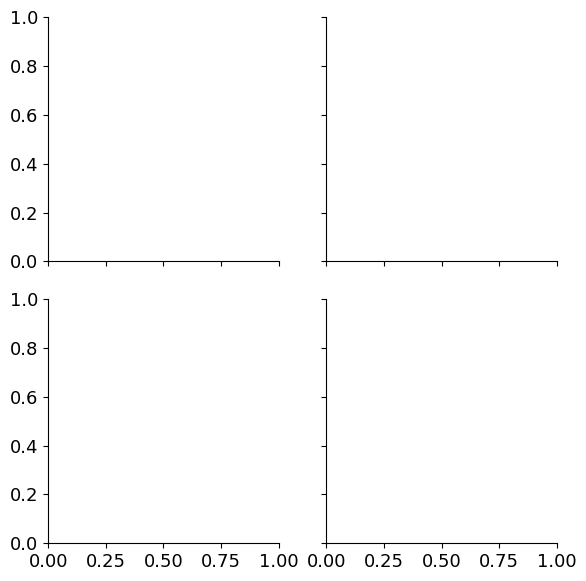

In [26]:
# FacetGrid()

# seaborn.FacetGrid(data, row=None, col=None, hue=None, col_wrap=None, 
# sharex=True, sharey=True, height=3, aspect=1, palette=None, 
# row_order=None, col_order=None, hue_order=None, hue_kws=None, 
# dropna=True, legend_out=True, despine=True, margin_titles=False, 
# xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)

tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time", row="smoker")#2*2


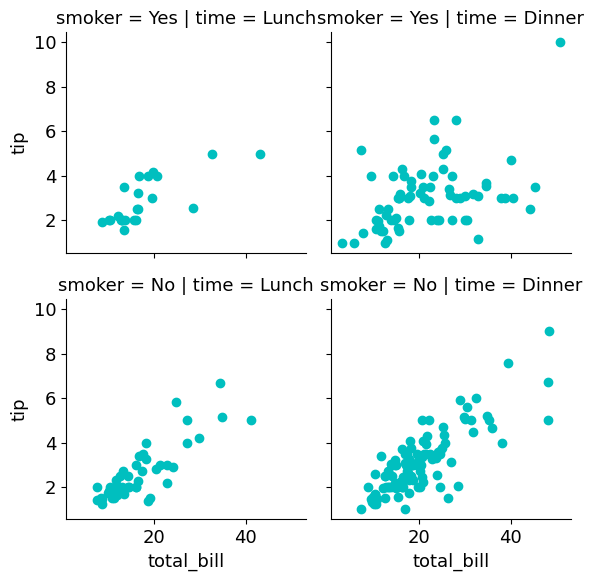

In [27]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time", row="smoker")
g = g.map(plt.scatter, "total_bill", "tip", color="c")

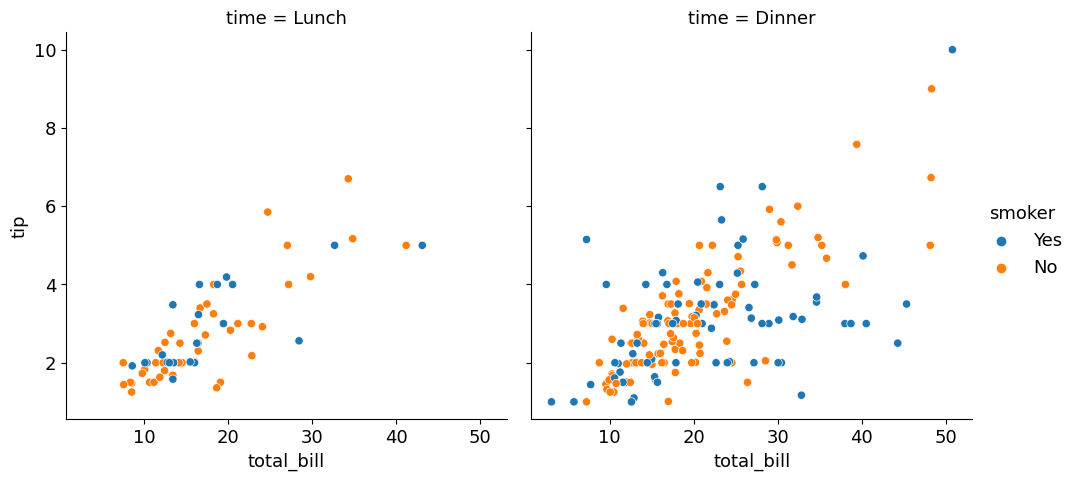

In [28]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", color="c",col="time",  hue="smoker",data=tips)

<Figure size 1000x600 with 0 Axes>

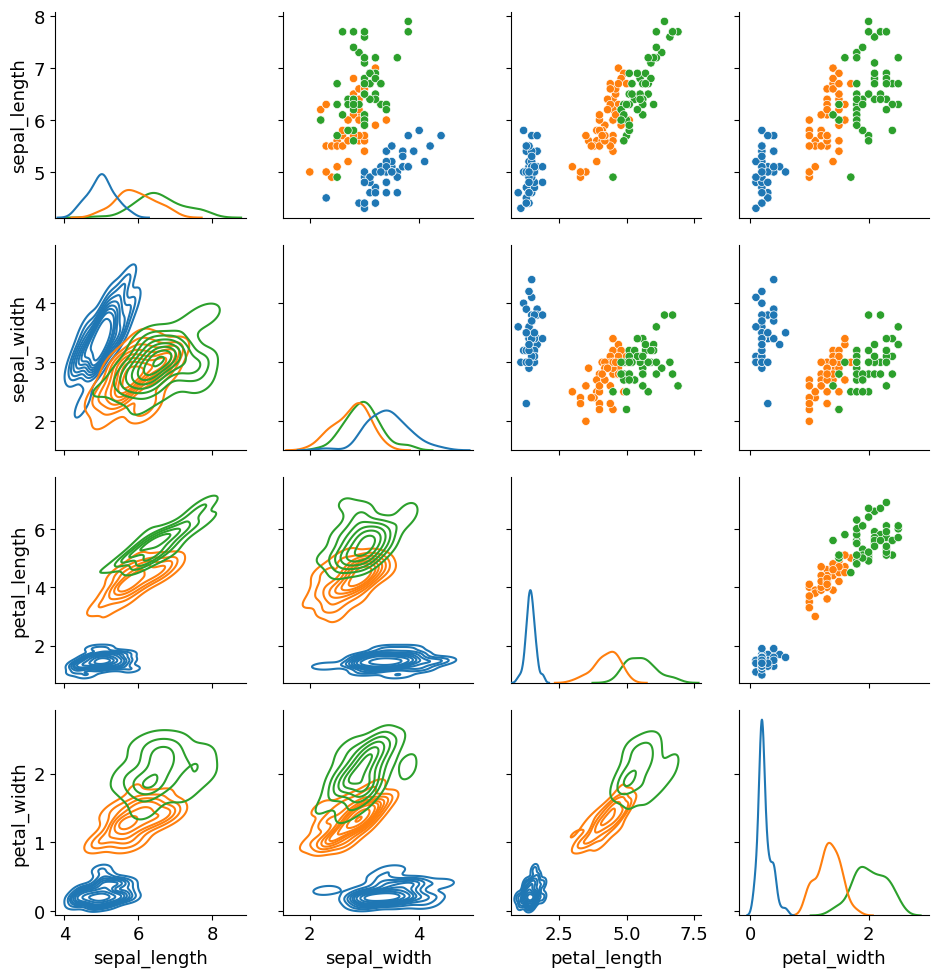

In [14]:
# PairGrid()

iris = sns.load_dataset("iris")
plt.figure(figsize=(10,6) )
g = sns.PairGrid(iris,hue="species")
g = g.map_upper(sns.scatterplot)#在上对角线子图上用二元函数绘制的图
g = g.map_lower(sns.kdeplot,color='r')#在下对角线子图上用二元函数绘制的图
g = g.map_diag(sns.kdeplot)#对角线单变量子图

plt.savefig("../pkl/iris.png", dpi=600)


In [30]:
# 主题(style)

# set, 通用设置接口
# set_style, 风格专用设置接口, 设置后全局风格随之改变
# axes_style, 设置当前图(axes级)的风格, 同时返回设置后的风格系列参数, 支持with关键字用法

sns.set_style("whitegrid")  # 白色网格背景
sns.set_style("darkgrid")   # 灰色网格背景
sns.set_style("dark")       # 灰色背景
sns.set_style("white")      # 白色背景
sns.set_style("ticks")      # 四周加边框和刻度

In [31]:
# 环境(context)

# set, 通用设置接口
# set_context, 环境设置专用接口, 设置后全局绘图环境随之改变
# plotting_context, 设置当前图(axes级)的绘图环境, 同时返回设置后的环境系列参数, 支持with关键字用法

sns.plotting_context("notebook")  # 默认
sns.plotting_context("paper")
sns.plotting_context("talk")
sns.plotting_context("poster")



{'axes.linewidth': 2.5,
 'grid.linewidth': 2,
 'lines.linewidth': 3.0,
 'lines.markersize': 12,
 'patch.linewidth': 2,
 'xtick.major.width': 2.5,
 'ytick.major.width': 2.5,
 'xtick.minor.width': 2,
 'ytick.minor.width': 2,
 'xtick.major.size': 12,
 'ytick.major.size': 12,
 'xtick.minor.size': 8,
 'ytick.minor.size': 8,
 'font.size': 24,
 'axes.labelsize': 24,
 'axes.titlesize': 24,
 'xtick.labelsize': 22,
 'ytick.labelsize': 22,
 'legend.fontsize': 22,
 'legend.title_fontsize': 24}

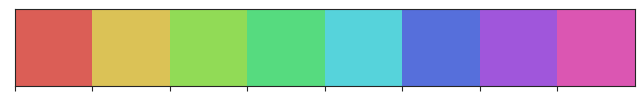

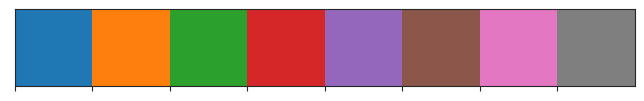

In [32]:
# 颜色 color_palette()

# color_palette, 基于RGB原理设置颜色的接口, 可接收一个调色板对象作为参数, 同时可以设置颜色数量
# hls_palette, 基于Hue(色相), Luminance(亮度), Saturation(饱和度)原理设置颜色的接口, 除了颜色数量参数外, 另外3个重要参数即是hls

sns.palplot(sns.hls_palette(n_colors=8))
sns.palplot(sns.color_palette(n_colors=8))



findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


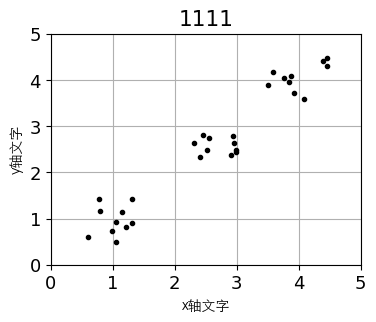

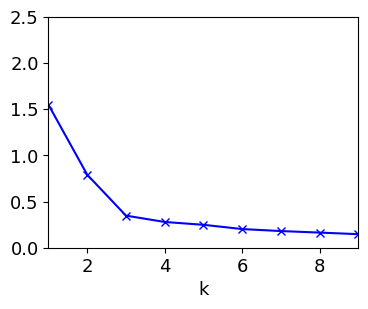

In [2]:
# 随机生成一个实数, 范围在(0.5,1.5)之间, 2行10列
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(3.5, 4.5, (2, 10))
cluster3 = np.random.uniform(2, 3, (2, 10))
X = np.hstack((cluster1, cluster2,cluster3)).T  # hstack拼接操作
# print(X)

plt.figure(figsize=(4,3) )
plt.figure(1) # 生成第一张图
plt.axis([0, 5, 0, 5]) # 横轴为0-5, 纵轴为0-5
plt.grid(True) # 是否有网格
plt.xlabel('x轴文字', fontproperties=zhfont) # x轴文字
plt.ylabel('y轴文字', fontproperties=zhfont) # y轴文字
plt.plot(X[:, 0], X[:, 1], 'k.') # K为黑色, k.为黑色的点  # [:,0]代表全部行第0列
plt.title("1111") # 给个标题
# plt.show()


K = range(1, 10)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min( cdist(X, kmeans.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]) # 用scipy求解距离

plt.figure(figsize=(4,3) )
plt.figure(2) # 生成第二张图
plt.axis([1, 9, 0, 2.5]) # 横轴为1-9, 纵轴为0-2.5
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.show()
plt.close()


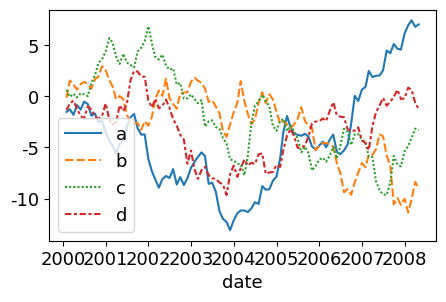

In [9]:
# 绘制时间序列数据
index = pd.date_range("1 1 2000", periods=100,freq="m", name="date") 
data = np.random.randn(100, 4).cumsum(axis=0) # 构建 时间序列数据 从2000-1-31开始, 以月份为间隔, 构建100条记录
wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"]) # 构建5列数据, 列名分别为data a b c d
plt.figure(figsize=(5,3) )
sns.lineplot(data=wide_df)
plt.show()

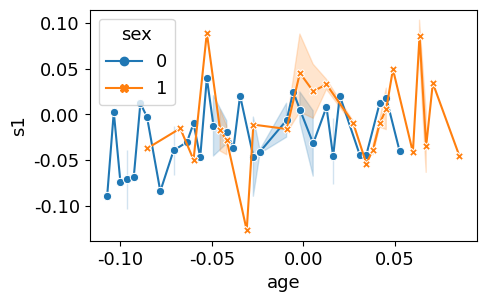

In [5]:
# 绘制带有误差带的单线图, 显示置信区
from sklearn.datasets import load_diabetes

def fun(x):
    if x >0:
        return 1
    else:
        return 0

diabetes = load_diabetes() # sklearn自带数据 diabetes 糖尿病数据集
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df = data[:80] # 只抽取前80个数据
# 由于diabetes中的数据均已归一化处理过, sex列中的值也归一化, 现将其划分一下, 大于0的设置为1, 小于等于0的设置为0
df['sex'] = df['sex'].apply(lambda x: fun(x))
# df[:5] # 展示前5条数据

# 由于diabetes中的数据均已归一化处理过, sex列中的值也归一化, 现将其划分一下, 大于0的设置为1, 小于等于0的设置为0


plt.figure(figsize=(5,3) )
# ax = sns.lineplot(x="age", y="s4",data=df) # 绘制带有误差带的单线图, 显示置信区间
# sns.lineplot(x="age", y="s4", hue="sex",data=df) # 设置hue为sex,按照sex分组, 并显示不同颜色
# sns.lineplot(x="age", y="s1",hue="sex", style="sex", data=df) # 使用颜色和线型显示分组变量
sns.lineplot(x="age", y="s1",hue="sex", style="sex", markers=True, dashes=False, data=df) # 使用标记来标识组, 而不用破折号来标识组:设置markers为True,设置dashes为False
# sns.lineplot(x="age", y="s5",hue="sex",err_style="bars", ci=68, data=df) # 显示错误条, 而不显示错误带

plt.show()

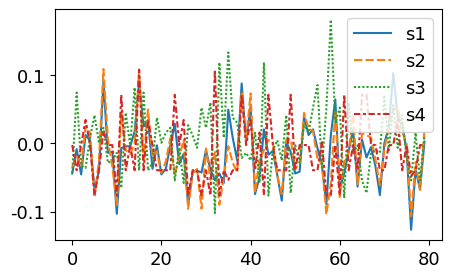

In [7]:
from sklearn.datasets import load_diabetes

def fun(x):
    if x >0:
        return 1
    else:
        return 0

# sklearn自带数据 diabetes 糖尿病数据集
diabetes=load_diabetes()
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
#只抽取前80个数据
df=data[:80]
#由于diabetes中的数据均已归一化处理过, sex列中的值也归一化, 现将其划分一下, 大于0的设置为1, 小于等于0的设置为0
df['sex']=df['sex'].apply(lambda x: fun(x))
dd = [df['s1'],df['s2'],df['s3'],df['s4']]
plt.figure(figsize=(5,3) )
ax = sns.lineplot(data=dd) # 案例2:绘制带有误差带的单线图, 显示置信区间
plt.show()

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


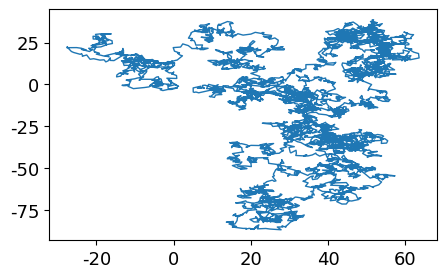

In [2]:
x, y = np.random.randn(2, 5000).cumsum(axis=1)
plt.figure(figsize=(5,3) )
sns.lineplot(x=x, y=y, sort=False, lw=1)
plt.show()

In [ ]:
import pyecharts.options as opts
from pyecharts.charts import Candlestick

x_data = ["2017-10-24", "2017-10-25", "2017-10-26", "2017-10-27"]
y_data = [[20, 30, 10, 35], [40, 35, 30, 55], [33, 38, 33, 40], [40, 40, 32, 42]]

(
    Candlestick(init_opts=opts.InitOpts(width="1440px", height="720px"))
    .add_xaxis(xaxis_data=x_data)
    .add_yaxis(series_name="", y_axis=y_data)
    .set_series_opts()
    .set_global_opts(
        yaxis_opts=opts.AxisOpts(
            splitline_opts=opts.SplitLineOpts(
                is_show=True, linestyle_opts=opts.LineStyleOpts(width=1)
            )
        )
    )
    .render("../pkl/basic_candlestick.html")
)
